In [1]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import numpy as np

### Loading data

In [2]:
meteo = pd.read_excel("../data/meteo_2017_2022.xlsx")
itk_SD = pd.read_excel("../data/ITK_TrajectOire.xlsx", sheet_name="SD")
itk_PN = pd.read_excel("../data/ITK_TrajectOire.xlsx", sheet_name="PN")
itk_ref = pd.read_excel("../data/ITK_TrajectOire.xlsx", sheet_name="Ref")
itk_BI = pd.read_excel("../data/ITK_TrajectOire.xlsx", sheet_name="BasInt")
itk_Bio = pd.read_excel("../data/ITK_TrajectOire.xlsx", sheet_name="Bio")
itk_Elev = pd.read_excel("../data/ITK_TrajectOire.xlsx", sheet_name="Elev")
ntraj = pd.read_excel("../data/Data_Ntraj.xlsx")

In [3]:
meteo.head()

,Date,Mois,Année,Temp moyenne (°C),Pluie (mm),Temp min,Temp max,ETP Penman (mm),Humidité moyenne (%),Humidité max (%),Humidité min (%)
0,2017-09-15,9,2017,11.2,0.0,7.6,16.5,2.3,84.0,99.0,56.0
1,2017-09-16,9,2017,10.7,1.0,4.8,15.6,1.6,86.0,100.0,57.0
2,2017-09-17,9,2017,11.3,3.0,9.4,15.7,1.5,89.0,100.0,66.0
3,2017-09-18,9,2017,10.5,9.0,4.4,17.1,1.6,91.0,100.0,70.0
4,2017-09-19,9,2017,11.7,2.0,9.2,16.8,1.7,88.0,99.0,60.0


In [4]:
itk_SD.head()

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,...,Unité_3,% concerné_3,Type_4,Quantité_4,Unité_4,% concerné_4,Type_5,Quantité_5,Unité_5,% concerné_5
0,Blé,2017-2018,2017-10-05 00:00:00,40.0,Sol nu,OC_Semis,Semoir Semeato,Semé par Christian,1,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blé,2017-2018,2017-10-05 00:00:00,40.0,Sol nu,Ajout_semence,Traité,Boregar,220,gr./m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Blé,2017-2018,2017-10-05 00:00:00,40.0,Sol nu,Ajout_phyto,Traitement de semence,Gaucho,NaN,Dose hom.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Blé,2017-2018,2017-10-08 00:00:00,40.0,Sol nu,OC_Travail,Roulage 9m – tract 130 ch,NaN,1,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Blé,2017-2018,2017-10-31 00:00:00,44.0,Blé,OC_Autre,Traitement phyto - Pulve 3400 litres,NaN,1,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ntraj.head()

,Bande,Date,%H - h1,%H - h2,NO3 Sol - h1\nkgN.ha-1,NO3 Sol - h2\nkgN.ha-1,NH4 Sol - h1\nkgN.ha-1,NH4 Sol - h2\nkgN.ha-1,N2O gN.ha-1.j-1,Fertilisation (kgN.ha-1),N biomasse aérienne\n (KgN.ha-1),INN ou N Tester,INN ou N Tester ZéroN,PRS N-NO3\n(µg.10cm-2.14j-1),PRS N-NH4\n(µg.10cm-2.14j-1),PRS N-NO3 ZéroN\n(µg.10cm-2.14j-1),PRS N-NH4 ZéroN\n(µg.10cm-2.14j-1)
0,Elev8,2017-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACS,2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Toutes,2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Toutes,2018-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACS,2018-03-08,NaN,NaN,NaN,NaN,NaN,NaN,13.119371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(meteo.shape)
print(itk_SD.shape)
print(ntraj.shape)

(1749, 11)
(1036, 31)
(2871, 17)


### NLP

Un peu de traitement de langage pour enlever les accents, raccourcir les expressions et rendre le tout plus lisible. On applique ça sur tout ce qui contient des str (itk en particulier). Petit pb: l'encodage des accents en particulier pose pb avec les colonnes qui ont des NA, donc on l'applique à la fin, ce qui est dommage. Probablement un moyen de contourner/éviter ça

In [7]:
from unidecode import unidecode

def preprocess(df):
    str_col = df.select_dtypes(include=['string']).columns
    df[str_col] = df[str_col].replace(' ', '_', regex=True)
    df[str_col] = df[str_col].apply((lambda x: x.str.lower()), axis=1) 
    for x in str_col:    
        df[x] = df[x].apply(unidecode)
    return(df)

### ITK 

In [8]:
itk_SD.tail()

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,...,Unité_3,% concerné_3,Type_4,Quantité_4,Unité_4,% concerné_4,Type_5,Quantité_5,Unité_5,% concerné_5
1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Beaucoup de NA en fin de tableau car en remplissant ses excels Mr Python a mit des valeurs nulles/NA jusqu'à très loin, on va enlever les rangées pleines de NA

In [9]:
itk_SD.isna().all(axis=0) # Trouver toutes les colonnes avec que des NA
itk_SD.isna().all(axis=0) # Trouver toutes les lignes avec que des NA

Culture princ.           False
Année                    False
Date                     False
Semaine                  False
Peuplement               False
Type d'opération         False
Type_1                   False
Info complémentaire 1    False
Quantité_1               False
Unité_1                  False
% concerné_1             False
Remarques générales      False
Matière active           False
Dose MA/ha               False
Unité Ma/ha              False
Type_2                   False
Quantité_2                True
Unité_2                  False
% concerné_2             False
Type_3                    True
Quantité_3                True
Unité_3                   True
% concerné_3              True
Type_4                    True
Quantité_4                True
Unité_4                   True
% concerné_4              True
Type_5                    True
Quantité_5                True
Unité_5                   True
% concerné_5              True
dtype: bool

In [10]:
def clear_na(df : object) -> object :
    """
    Clear all colonnes and rows contaning only Na
    """
    df = df.drop(df.index[df.isna().all(axis = 1)], axis = 0) # Row
    df = df.drop(df.columns[df.isna().all(axis = 0)], axis = 1) # Col
    return df

itk_SD = clear_na(itk_SD)
itk_PN = clear_na(itk_PN)
itk_BI = clear_na(itk_BI)
itk_Bio = clear_na(itk_Bio)
itk_Elev = clear_na(itk_Elev)
itk_ref = clear_na(itk_ref)

il reste des lignes remplies de NA sauf sur une colonne dans itk_SD, on les enlève à la main

In [11]:
print(itk_SD.Date.dtypes)
itk_SD["Date"] = itk_SD["Date"].astype("string")
print(itk_SD.shape)

object
(200, 18)


Il y a une date inconnue dans itk_SD notée xx, on la retire car elle pose problème (pas de type datetime)

In [12]:
itk_SD.drop(itk_SD.loc[itk_SD['Date']=="xx/07/18"].index, inplace=True)

In [13]:
print(itk_SD.shape)
print(itk_SD.Date.dtypes)
itk_SD["Date"] = pd.to_datetime(itk_SD["Date"], format="%Y-%m-%d %H:%M:%S")
print(itk_SD.Date.dtypes)

(196, 18)
string
datetime64[ns]


In [14]:
print(itk_SD.shape)
print(itk_PN.shape)
print(itk_BI.shape)
print(itk_Bio.shape)
print(itk_Elev.shape)
print(itk_ref.shape)

(196, 18)
(167, 16)
(118, 15)
(53, 12)
(169, 15)
(162, 15)


J'ai checké ces tailles sur Excel et elles correspondent bien au nombre de lignes remplies.

In [15]:
# remise à niveau des indices
itk_SD.reset_index(drop=True, inplace=True)
itk_PN.reset_index(drop=True, inplace=True)
itk_BI.reset_index(drop=True, inplace=True)
itk_Bio.reset_index(drop=True, inplace=True)
itk_Elev.reset_index(drop=True, inplace=True)
itk_ref.reset_index(drop=True, inplace=True)

In [16]:
# On indique le nom des bandes pour pouvoir savoir à quoi elles correspondent une fois qu'on va merge par dates

itk_SD["Bande"] = "acs"
itk_PN["Bande"] = "pn"
itk_BI["Bande"] = "bi"
itk_Bio["Bande"] = "bio"
itk_Elev["Bande"] = "elev"
itk_ref["Bande"] = "ref"

In [17]:
itk_ref = itk_ref.dropna(subset=["Type d'opération"])

#### Vérification des dates

In [18]:
itk_SD = itk_SD.dropna(subset=['Date'])
itk_PN = itk_PN.dropna(subset=['Date'])
itk_BI = itk_BI.dropna(subset=['Date'])
itk_Bio = itk_Bio.dropna(subset=['Date'])
itk_Elev = itk_Elev.dropna(subset=['Date'])
itk_ref = itk_ref.dropna(subset=['Date'])

##### Vérification des données cultures / peuplement

In [19]:
print(itk_SD["Culture princ."].unique())
print(itk_PN["Culture princ."].unique())
print(itk_BI["Culture princ."].unique())
print(itk_Elev["Culture princ."].unique())
print(itk_ref["Culture princ."].unique())
print(itk_Bio["Culture princ."].unique())

['Blé' 'Escourgeon' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Orge de printemps' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Escourgeon' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Orge de printemps' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Triticale' 'Féverolle' 'Blé ' 'Maïs' nan]


In [20]:
itk_Bio[itk_Bio["Culture princ."].isnull()]

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Remarques générales,Bande
51,NaN,NaN,2022-05-05,19.0,Sol nu,OC_Semis,Semis comb. Semoir/Herse rotative/Tasse avant(...,NaN,1.0,ha,1.0,NaN,bio
52,NaN,NaN,2022-05-05,19.0,Sol nu,Ajout_semence,Non traité,Maïs P9610,9.6,gr./m2,1.0,NaN,bio


In [21]:
## On remarque aussi qu'on a une entrée avec date mais sans mention de la culture principale, 
## on va regarder si on a des infos sur cette bande autour de cette date pour compléter.

itk_Bio[itk_Bio["Date"] < "2022-05-05"].tail()

## Il s'agit bien de maïs vu les données sur les dates précédentes, on remplit donc avec cette information.

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Remarques générales,Bande
45,Maïs,2021-2022,2022-04-22,17.0,Résidus,OC_Engrais,Ep. engrais_min_solide 9m - DP9,NaN,NaN,ha,1.0,NaN,bio
46,Maïs,2021-2022,2022-04-22,17.0,Résidus,Ajout_engrais,Engrais organique,NaN,800.0,kg/ha,1.0,NaN,bio
47,Maïs,2021-2022,2022-04-23,17.0,Résidus,OC_Autre,"Broyage 3,6m – tract 130 ch",NaN,1.0,ha,1.0,NaN,bio
48,Maïs,2021-2022,2022-04-23,17.0,Résidus,OC_Travail,Labour 5 corps – tract 130 ch,NaN,1.0,ha,1.0,NaN,bio
49,Maïs,2021-2022,2022-04-23,17.0,Sol nu,OC_Travail,Herse rotative 4m – tract 130 ch,NaN,1.0,ha,1.0,NaN,bio


In [22]:
itk_Bio["Culture princ."][itk_Bio["Culture princ."].isnull()] = "Maïs"

In [23]:
itk_Bio[itk_Bio["Date"] == "2022-05-05"]

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Remarques générales,Bande
51,Maïs,NaN,2022-05-05,19.0,Sol nu,OC_Semis,Semis comb. Semoir/Herse rotative/Tasse avant(...,NaN,1.0,ha,1.0,NaN,bio
52,Maïs,NaN,2022-05-05,19.0,Sol nu,Ajout_semence,Non traité,Maïs P9610,9.6,gr./m2,1.0,NaN,bio


#### Concaténation

In [24]:
itk_concat = pd.concat([itk_SD, itk_PN, itk_BI, itk_Bio, itk_Elev, itk_ref], axis=0)

In [25]:
print(itk_SD.shape[0] + itk_PN.shape[0] + itk_BI.shape[0] + itk_Bio.shape[0] + itk_Elev.shape[0] + itk_ref.shape[0])
print(itk_concat.shape)

852
(852, 19)


In [26]:
itk_concat.columns

Index(['Culture princ.', 'Année', 'Date', 'Semaine', 'Peuplement',
       'Type d'opération', 'Type_1', 'Info complémentaire 1', 'Quantité_1',
       'Unité_1', '% concerné_1', 'Remarques générales', 'Matière active',
       'Dose MA/ha', 'Unité Ma/ha', 'Type_2', 'Unité_2', '% concerné_2',
       'Bande'],
      dtype='object')

In [27]:
itk_concat.reset_index(drop=True, inplace=True)

In [28]:
itk_concat.columns

Index(['Culture princ.', 'Année', 'Date', 'Semaine', 'Peuplement',
       'Type d'opération', 'Type_1', 'Info complémentaire 1', 'Quantité_1',
       'Unité_1', '% concerné_1', 'Remarques générales', 'Matière active',
       'Dose MA/ha', 'Unité Ma/ha', 'Type_2', 'Unité_2', '% concerné_2',
       'Bande'],
      dtype='object')

In [29]:
## Changement du type object en type str pour en faciliter le traitement (regex, split)

itk_concat[itk_concat.select_dtypes("object").columns] = itk_concat[itk_concat.select_dtypes("object").columns].astype("string")

#### Ajout de la quantité d'apport azoté

Quantité devrait être un float, il faut le convertir. Seulement il y a des valeurs manquantes et il est compliqué de les remplacer. Egalement, comme toutes les quantités ne sont pas sur la même unité et ne correspondent pas au même produit, il faudrait pouvoir faire comprendre ça à l'algo ? --> on utilise les uN pour l'engrais, le reste on laisse tomber

In [30]:
itk_concat["Info complémentaire 1"]

0                         Semé par Christian
1                                    Boregar
2                                     Gaucho
3                                       <NA>
4                                       <NA>
                       ...                  
847    Aliseo Gold Safeneur (S-métolachlore)
848               Dakota P (Diméthénamide P)
849                Dakota P (Pendiméthaline)
850                                     <NA>
851                          Rendement à 9°H
Name: Info complémentaire 1, Length: 852, dtype: string

In [31]:
itk_concat["uN"] = 0

idx = itk_concat[~itk_concat["Info complémentaire 1"].isnull()][itk_concat[~itk_concat["Info complémentaire 1"].isnull()]["Info complémentaire 1"].str.contains("uN")].index

uNvalues = pd.Series([value[0].split(" ")[0] for value in itk_concat.loc[idx,:]["Info complémentaire 1"].str.split("_")])

uNvalues = uNvalues.apply(lambda x: str(x).replace('uN', ''))
uNvalues = uNvalues.apply(lambda x: str(x).replace(',', '.'))
uNvalues.unique()

array(['78', '76', '39', '31.2', '38', '72', '41', '99', '51', '94',
       '58.5', '57', '43', '56.55', '58', '34', '50', '37', '56', '90',
       'Orgaliz', '48', '40', '81', '29.25', '70', '119', '32', '92',
       '97'], dtype=object)

Valeur 'Orgaliz' qui met le bazar, on va regarder ce que c'est 

In [32]:
itk_concat[itk_concat["Info complémentaire 1"].str.contains('Orgaliz')]

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Remarques générales,Matière active,Dose MA/ha,Unité Ma/ha,Type_2,Unité_2,% concerné_2,Bande,uN
487,Triticale,2018-2019,2019-02-25,9.0,Triticale,Ajout_engrais,Engrais organique,Orgaliz F 12-2-0 (88 uN),733.0,kg/ha,0.96,88 uN - Attention une zone…,<NA>,<NA>,<NA>,<NA>,NaN,NaN,bio,0


On remplace cette valeur par 88

In [33]:
uNvalues[uNvalues=='Orgaliz'] = '88'
uNvalues.unique()

array(['78', '76', '39', '31.2', '38', '72', '41', '99', '51', '94',
       '58.5', '57', '43', '56.55', '58', '34', '50', '37', '56', '90',
       '88', '48', '40', '81', '29.25', '70', '119', '32', '92', '97'],
      dtype=object)

In [34]:
uNvalues = uNvalues.astype("float64")

In [35]:
for id_df, id_uN in zip(idx, uNvalues.index):
    itk_concat.at[id_df,"uN"] = uNvalues[id_uN]

In [36]:
itk_concat.head(10)

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Remarques générales,Matière active,Dose MA/ha,Unité Ma/ha,Type_2,Unité_2,% concerné_2,Bande,uN
0,Blé,2017-2018,2017-10-05,40.0,Sol nu,OC_Semis,Semoir Semeato,Semé par Christian,1,ha,1.00,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,acs,0.0
1,Blé,2017-2018,2017-10-05,40.0,Sol nu,Ajout_semence,Traité,Boregar,220,gr./m2,1.00,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,acs,0.0
2,Blé,2017-2018,2017-10-05,40.0,Sol nu,Ajout_phyto,Traitement de semence,Gaucho,<NA>,Dose hom.,1.00,"175 g/L * 0,4 L/q * 220 grains/m2 *0,056 g/gra...",Imidacloprid,86,g,<NA>,NaN,NaN,acs,0.0
3,Blé,2017-2018,2017-10-08,40.0,Sol nu,OC_Travail,Roulage 9m – tract 130 ch,<NA>,1,ha,1.00,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,acs,0.0
4,Blé,2017-2018,2017-10-31,44.0,Blé,OC_Autre,Traitement phyto - Pulve 3400 litres,<NA>,1,ha,1.00,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,acs,0.0
5,Blé,2017-2018,2017-10-31,44.0,Blé,Ajout_phyto,Herbicides,Varia (chlorotoluron 400 g/L),0.8888888888888888,Dose hom.,1.00,4L/ha - Ray-grass visé,Chlorotoluron,1600,g,<NA>,NaN,NaN,acs,0.0
6,Blé,2017-2018,2017-10-31,44.0,Blé,Ajout_phyto,Herbicides,Varia (Diflufénicanil 25 g/L ),0.8888888888888888,Dose hom.,1.00,4L/ha - Ray-grass visé,Diflufénicanil,100,g,<NA>,NaN,NaN,acs,0.0
7,Blé,2017-2018,2018-03-06,10.0,Blé,OC_Engrais,ép. Engrais_min_liquide – Pulve 3400 litres,<NA>,1,ha,0.96,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,acs,0.0
8,Blé,2017-2018,2018-03-06,10.0,Blé,Ajout_engrais,Solution 39,78 uN,200,l/ha,0.96,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,acs,78.0
9,Blé,2017-2018,2018-03-27,13.0,Blé,OC_Engrais,ép. Engrais_min_liquide – Pulve 3400 litres,<NA>,1,ha,0.96,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,acs,0.0


On remarque qu'il y a des doublons de dates et que les valeurs de uN ne sont pas inscrites sur toutes les dates, donc on corrige ça.

In [37]:
dates_un = [itk_concat.loc[id,:]["Date"] for id in idx]
for date,value in zip(dates_un,uNvalues):
    itk_concat["uN"][itk_concat["Date"]==date] = value

/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_38837/2183051193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itk_concat["uN"][itk_concat["Date"]==date] = value


Nature de l'engrais ? 2 possibilités : lisier/fumier ou minéral. Seule la bande elevage a de l'engrais issu de lisier/fumier, l'information est contenue dans la nature de la bande.

#### Ajout travail du sol ou non

travail ou pas travail, identification des outils --> roulage tasse, mais retenir labour, déchaumage, il faut bien identifier ce qui correspond à un travail du sol. Travail du sol + météo vont jouer sur WFPS (vie dans le sol). Effet des précipitations : qlq semaines/jours ? A tester. 

In [38]:
itk_concat[itk_concat["Type d'opération"].str.contains("Travail")]["Type_1"].unique()

<StringArray>
[                          'Roulage 9m – tract 130 ch',
            'Crosskillettes roulage 6m – tract 130 ch',
                                             'Carrier',
                       'Labour 5 corps – tract 130 ch',
   'Dechaumage (cover crop 36 disques) – tract 130 ch',
                                      'Labour 8 corps',
                       'Labour 4 corps – tract 130 ch',
                    'Herse rotative 4m – tract 130 ch',
 'Dechaumage chizel (cultivateur 4,5m) – tract 180 ch',
                          'Herse étrille tract 100 ch',
                      'Vibroculteur 6m – tract 130 ch']
Length: 11, dtype: string

Si la colonne contient "roulage" on considère le sol non travaillé, sinon oui. On retire aussi l'information "carrier" qui correspond juste au fait d'amener la semence sur le terrain.

In [39]:
itk_concat["Travail_sol"] = 0
idx_sol = itk_concat[itk_concat["Type d'opération"].str.contains("Travail")][~itk_concat[itk_concat["Type d'opération"].str.contains("Travail")]["Type_1"].str.contains("Roulage|roulage|Carrier")].index
itk_concat.loc[itk_concat["Date"].isin(itk_concat.loc[idx_sol, "Date"]),"Travail_sol"] = 1

#### Ajout d'une colonne phyto ou non

In [40]:
# On peut faire une fonction parce que tu fais le même procédé plusieurs fois après
def Detect_Add_Col(df : object, col_search : str, col_name : str, Critere : str) -> object :
    """
    Search on the col_search the critere and create a new bolean colonne named col_name based on the Date colonne
    """
    df[col_name] = 0 # Initialized values to 0
    indexs = df[df[col_search].str.contains(Critere)].index # Get the indexs
    df.loc[df["Date"].isin(df.loc[indexs, "Date"]), col_name] = 1 # Find if there is the date as the indexs positions selected 
    return df


In [41]:
# Proposition
itk_concat = Detect_Add_Col(itk_concat, "Type d'opération", "Ajout_phyto", "Ajout_phyto")

#### Ajout d'une colonne indiquant le jour de semence

In [42]:
# Proposition
itk_concat = Detect_Add_Col(itk_concat, "Type d'opération","Semis", "semence")

#### Ajout d'une colonne indiquant le jour de récolte

In [43]:
# Proposition
itk_concat = Detect_Add_Col(itk_concat, "Type d'opération" ,"Recolte", "Récolte")

In [44]:
itk_concat["Type d\'opération"].unique()

<StringArray>
[     'OC_Semis', 'Ajout_semence',   'Ajout_phyto',    'OC_Travail',
      'OC_Autre',    'OC_Engrais', 'Ajout_engrais',       'Récolte',
         'Autre']
Length: 9, dtype: string

In [45]:
itk_concat[itk_concat["Type d\'opération"]=="Ajout_engrais"]["uN"].unique()

array([78.  , 57.  , 43.  , 37.  , 38.  , 72.  , 51.  , 99.  ,  0.  ,
       92.  , 34.  , 97.  , 58.5 , 32.  , 40.  , 39.  , 58.  , 88.  ,
       48.  , 81.  , 29.25, 90.  ])

- OC_travail --> Travail_sol (0/1)
- Ajout_semence/OC_semis --> Semis (0/1)
- Ajout_phyto --> Ajout_phyto (0/1)
- Ajout_engrais/OC_engrais --> valeur de uN (float)
- Récolte --> Recolte (0/1)

In [46]:
itk_concat

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,...,Unité Ma/ha,Type_2,Unité_2,% concerné_2,Bande,uN,Travail_sol,Ajout_phyto,Semis,Recolte
0,Blé,2017-2018,2017-10-05,40.0,Sol nu,OC_Semis,Semoir Semeato,Semé par Christian,1,ha,...,<NA>,<NA>,NaN,NaN,acs,0.0,1,1,1,0
1,Blé,2017-2018,2017-10-05,40.0,Sol nu,Ajout_semence,Traité,Boregar,220,gr./m2,...,<NA>,<NA>,NaN,NaN,acs,0.0,1,1,1,0
2,Blé,2017-2018,2017-10-05,40.0,Sol nu,Ajout_phyto,Traitement de semence,Gaucho,<NA>,Dose hom.,...,g,<NA>,NaN,NaN,acs,0.0,1,1,1,0
3,Blé,2017-2018,2017-10-08,40.0,Sol nu,OC_Travail,Roulage 9m – tract 130 ch,<NA>,1,ha,...,<NA>,<NA>,NaN,NaN,acs,0.0,0,0,0,0
4,Blé,2017-2018,2017-10-31,44.0,Blé,OC_Autre,Traitement phyto - Pulve 3400 litres,<NA>,1,ha,...,<NA>,<NA>,NaN,NaN,acs,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,Maïs,2021-2022,2022-04-23,17.0,Maïs,Ajout_phyto,Herbicides,Aliseo Gold Safeneur (S-métolachlore),0.9174311926605504,Dose hom.,...,<NA>,<NA>,NaN,NaN,ref,0.0,1,1,0,0
848,Maïs,2021-2022,2022-04-23,17.0,Maïs,Ajout_phyto,Herbicides,Dakota P (Diméthénamide P),0.875,Dose hom.,...,<NA>,<NA>,NaN,NaN,ref,0.0,1,1,0,0
849,Maïs,2021-2022,2022-04-23,17.0,Maïs,Ajout_phyto,Herbicides,Dakota P (Pendiméthaline),0.875,Dose hom.,...,<NA>,<NA>,NaN,NaN,ref,0.0,1,1,0,0
850,Colza,2019-2020,2020-07-21,30.0,Colza,OC_Autre,Moisson – moissonneuse 260 ch,<NA>,1.0,<NA>,...,<NA>,<NA>,NaN,NaN,ref,0.0,0,0,0,1


On peut maintenant retirer les informations qu'on a utilisées pour créer nos nouvelles colonnes.

In [47]:
# On retire les informations inutiles/répétitives

print(itk_concat.shape)
itk_concat = itk_concat.drop(["Info complémentaire 1", "Quantité_1", "Unité_1", "% concerné_1", "Année", "Type_1", "Type d'opération"], axis=1)

itk_concat.sort_values(by='Date', inplace=True)
itk_concat.reset_index(drop=True, inplace=True)
print(itk_concat.shape)

(852, 24)
(852, 17)


In [48]:
from dateutil.rrule import rrule, DAILY

def build_itk(itk):

    date_b = itk["Date"].min() 
    date_e = itk["Date"].max() 

    res = [dt.strftime('%Y-%m-%d') for dt in rrule(freq=DAILY, dtstart=date_b, until=date_e)] # liste des dates

    CP = pd.DataFrame({"Date":res, "CP":np.nan, "Peuplement":np.nan}) # construction d'un dataframe avec une ligne par date + culture principale et peuplement
    # on va construire la colonne de culture principale
    
    ref = itk["Culture princ."][itk["Date"]==date_b] # quel est la culture de la première date
    for date in CP["Date"].astype("string"): # on parcourt toutes les dates
        if date in list(itk["Date"].astype("string")): # si ces dates sont inclues dans la liste de dates de l'itinéraire technique
            ref = itk["Culture princ."][itk["Date"]==date].values[0]  # on change la ref
            CP.loc[CP['Date'] == date, 'CP'] = ref # et on l'attribue à cette date (j'ai changé pour méthode de définition explicite pour régler la valeur à assigner)

    CP["CP"].fillna(0, inplace=True) # simplifie les choses
    rec = itk["Date"][itk["Type d'opération"].str.contains("Récolte")] # on récupère les dates de récolte car on sait qu'après ces dates la culture change

    CP = CP.iloc[::-1].reset_index(drop=True) # on inverse le sens du dataframe

    for date in rec.astype("string"): # on parcourt les dates de récolte
        cult_act = CP["CP"][CP["Date"]==date] # on actualise la culture actuelle en fonction de la date
        CP.loc[CP['Date'] == date, 'CP'] = cult_act # et on l'attribue à cette date (j'ai changé pour méthode de définition explicite pour régler la valeur à assigner)

    CP = CP.iloc[::-1].reset_index(drop=True) # on réinverse le dataframe

    # maintenant on remplit les lignes vides sachant qu'à chaque récolte la culture a été changée

    ref = CP["CP"][0]
    filled_CP = [ref]
    for cp in CP["CP"][1:]:
        filled_CP.append(cp if cp != 0 else ref) #
        ref = cp if cp != 0 else ref

    CP["CP"] = filled_CP

    # même travail pour le peuplement (sauf la partie avec les récoltes)
    
    ref_p = itk["Peuplement"][itk["Date"]==date_b]

    for date in CP["Date"].astype("string"):
        if date in list(itk["Date"].astype("string")):
            ref_p = itk["Peuplement"][itk["Date"]==date].values[0]
            CP.loc[CP['Date'] == date, "Peuplement"] = ref_p  # méthode de définition explicite pour message erreur

    
    CP["Peuplement"].fillna(0, inplace=True)

    ref_p = CP["Peuplement"][0]
    filled_P = [ref_p]

    for p in CP["Peuplement"][1:]:
        filled_P.append(p if p != 0 else ref_p)
        ref_p = p if p != 0 else ref_p

    CP["Peuplement"] = filled_P
    
    return(CP)

In [49]:
CP_SD = build_itk(itk_SD)
CP_PN = build_itk(itk_PN)
CP_BI = build_itk(itk_BI)
CP_Bio = build_itk(itk_Bio)
CP_Elev = build_itk(itk_Elev)
CP_ref = build_itk(itk_ref)

In [50]:
CP_SD["Bande"] = "acs"
CP_BI["Bande"] = "bi"
CP_Bio["Bande"] = "bio"
CP_PN["Bande"] = "pn"
CP_Elev["Bande"] = "elev"
CP_ref["Bande"] = "ref"

In [51]:
print("Vérif cultures principales ACS")
print(CP_SD["CP"].unique())
print(itk_SD["Culture princ."].unique())

print("Vérif cultures principales PN")
print(CP_PN["CP"].unique())
print(itk_PN["Culture princ."].unique())

print("Vérif cultures principales BI")
print(CP_BI["CP"].unique())
print(itk_BI["Culture princ."].unique())

print("Vérif cultures principales Bio")
print(CP_Bio["CP"].unique())
print(itk_Bio["Culture princ."].unique())

print("Vérif cultures principales Elev")
print(CP_Elev["CP"].unique())
print(itk_Elev["Culture princ."].unique())

print("Vérif cultures principales ref")
print(CP_ref["CP"].unique())
print(itk_ref["Culture princ."].unique())

Vérif cultures principales ACS
['Blé' 'Escourgeon' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Escourgeon' 'Colza' 'Blé ' 'Maïs']
Vérif cultures principales PN
['Blé' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Colza' 'Blé ' 'Maïs']
Vérif cultures principales BI
['Blé' 'Orge de printemps' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Orge de printemps' 'Colza' 'Blé ' 'Maïs']
Vérif cultures principales Bio
['Blé' 'Triticale' 'Féverolle' 'Blé ' 'Maïs']
['Blé' 'Triticale' 'Féverolle' 'Blé ' 'Maïs']
Vérif cultures principales Elev
['Blé' 'Escourgeon' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Escourgeon' 'Colza' 'Blé ' 'Maïs']
Vérif cultures principales ref
['Blé' 'Orge de printemps' 'Colza' 'Blé ' 'Maïs']
['Blé' 'Orge de printemps' 'Colza' 'Blé ' 'Maïs']


#### Insertion des autres informations ponctuelles

In [52]:
def insert_col(CP,bande,col): 
    values = []
    itk = itk_concat[itk_concat["Bande"]==bande]
    for date in CP["Date"]:
        if date in list(itk["Date"].astype("string")) and np.any(itk[col][itk["Date"]==date].values)!=0:
            values.append(itk[col][itk["Date"]==date].values[0])
        else:
            values.append(0)
    return(values)

In [53]:
list_CP = [CP_SD, CP_PN, CP_BI, CP_Bio, CP_Elev, CP_ref]
list_bandes = ["acs","pn","bi","bio","elev","ref"]
list_cols = ["Travail_sol","Ajout_phyto","Semis","Recolte","uN"]

for cp,bande in zip(list_CP,list_bandes):
    for colonne in list_cols:
        cp[colonne] = insert_col(cp,bande,colonne) 

#### Ajout d'un décompte depuis le dernier travail du sol / ajout de phyto / semis / récolte

Il faut remettre les types à jour, les dates étaient en string jusqu'ici pour la manipulation mais on les repasse en datetime pour pouvoir faire des soustractions.

In [54]:
CP_SD["Date"] = CP_SD["Date"].astype("datetime64[ns]")
CP_PN["Date"] = CP_PN["Date"].astype("datetime64[ns]")
CP_BI["Date"] = CP_BI["Date"].astype("datetime64[ns]")
CP_Elev["Date"] = CP_Elev["Date"].astype("datetime64[ns]")
CP_Bio["Date"] = CP_Bio["Date"].astype("datetime64[ns]")
CP_ref["Date"] = CP_ref["Date"].astype("datetime64[ns]")

In [55]:
def timesince(CP,col):

    tsince = []
    last_date = -10
    for date,value in zip(CP["Date"],CP[col]):
        if value != 0: # peut être 1 pour les valeurs booléennes ou une valeur numérique pour uN
            last_date = date
            tsince.append(np.abs((last_date - date).days))
        else:
            if last_date == -10:
                tsince.append(np.nan) # si cet événement n'est pas encore arrivé (typiquement une récolte)
            else:
                tsince.append(np.abs((last_date - date).days))
    return(tsince)

In [56]:
list_cols = ["Travail_sol","Ajout_phyto","Semis","Recolte","uN"]
list_new_cols = ["nbJours_travail_sol","nbJours_phyto","nbJours_semis","nbJours_rec","nbJours_ferti"]

for cp in (list_CP):
    for colonne,new_col in zip(list_cols,list_new_cols):
        cp[new_col] = timesince(cp,colonne) 

In [57]:
CP_concat = pd.concat([CP_SD, CP_PN, CP_BI, CP_Bio, CP_Elev, CP_ref], axis=0).reset_index(drop=True)

Comme on sait que le travail du sol a un effet pendant ~ 3 mois selon Y. Python, on va mettre des 1 dans la colonne Travail_sol quand nbJours_travail_sol < 60.

Même travail pour phyto et engrais, sauf qu'on est sur 30, 45 ou 60 jours (incertitude des fenêtres données par Python).

In [58]:
def time_effect(colname1, colname2, nbJours, dataframe):
    """
    colname1 = colonne où on change les valeurs
    colname2 = colonne sur laquelle on se base pour changer les valeurs
    ne retourne rien, change juste des 0 en 1 dans une colonne d'intérêt
    """
    for id in dataframe.index:
        dataframe.at[id,colname1] = 1 if dataframe.at[id,colname2] < nbJours else 0

In [59]:
time_effect("Travail_sol_{}J".format(60), "nbJours_travail_sol", 60, CP_concat)

time_effect("Ajout_phyto_{}J".format(30), "nbJours_phyto", 30, CP_concat)
time_effect("Ajout_phyto_{}J".format(45), "nbJours_phyto", 45, CP_concat)
time_effect("Ajout_phyto_{}J".format(60), "nbJours_phyto", 60, CP_concat)

time_effect("Ajout_ferti_{}J".format(30), "nbJours_ferti", 30, CP_concat)
time_effect("Ajout_ferti_{}J".format(45), "nbJours_ferti", 45, CP_concat)
time_effect("Ajout_ferti_{}J".format(60), "nbJours_ferti", 60, CP_concat)

In [60]:
CP_concat

,Date,CP,Peuplement,Bande,Travail_sol,Ajout_phyto,Semis,Recolte,uN,nbJours_travail_sol,...,nbJours_semis,nbJours_rec,nbJours_ferti,Travail_sol_60J,Ajout_phyto_30J,Ajout_phyto_45J,Ajout_phyto_60J,Ajout_ferti_30J,Ajout_ferti_45J,Ajout_ferti_60J
0,2017-10-05,Blé,Sol nu,acs,1,1,1,0,0.0,0,...,0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2017-10-06,Blé,Sol nu,acs,0,0,0,0,0.0,1,...,1,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,2017-10-07,Blé,Sol nu,acs,0,0,0,0,0.0,2,...,2,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,2017-10-08,Blé,Sol nu,acs,0,0,0,0,0.0,3,...,3,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2017-10-09,Blé,Sol nu,acs,0,0,0,0,0.0,4,...,4,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,2022-04-19,Maïs,Sol nu,ref,0,0,0,0,0.0,29,...,256,262.0,348.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9943,2022-04-20,Maïs,Sol nu,ref,0,0,0,0,0.0,30,...,257,263.0,349.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9944,2022-04-21,Maïs,Sol nu,ref,1,1,1,0,58.0,0,...,0,264.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9945,2022-04-22,Maïs,Sol nu,ref,0,0,0,0,0.0,1,...,1,265.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
CP_concat.dtypes

Date                   datetime64[ns]
CP                             object
Peuplement                     object
Bande                          object
Travail_sol                     int64
Ajout_phyto                     int64
Semis                           int64
Recolte                         int64
uN                            float64
nbJours_travail_sol             int64
nbJours_phyto                 float64
nbJours_semis                   int64
nbJours_rec                   float64
nbJours_ferti                 float64
Travail_sol_60J               float64
Ajout_phyto_30J               float64
Ajout_phyto_45J               float64
Ajout_phyto_60J               float64
Ajout_ferti_30J               float64
Ajout_ferti_45J               float64
Ajout_ferti_60J               float64
dtype: object

In [62]:
CP_concat[CP_concat.select_dtypes("object").columns] = CP_concat[CP_concat.select_dtypes("object").columns].astype("string")
CP_concat[CP_concat.select_dtypes("int64").columns] = CP_concat[CP_concat.select_dtypes("int64").columns].astype("float64")

In [63]:
CP_concat.dtypes

Date                   datetime64[ns]
CP                             string
Peuplement                     string
Bande                          string
Travail_sol                   float64
Ajout_phyto                   float64
Semis                         float64
Recolte                       float64
uN                            float64
nbJours_travail_sol           float64
nbJours_phyto                 float64
nbJours_semis                 float64
nbJours_rec                   float64
nbJours_ferti                 float64
Travail_sol_60J               float64
Ajout_phyto_30J               float64
Ajout_phyto_45J               float64
Ajout_phyto_60J               float64
Ajout_ferti_30J               float64
Ajout_ferti_45J               float64
Ajout_ferti_60J               float64
dtype: object

In [64]:
CP_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9947 entries, 0 to 9946
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 9947 non-null   datetime64[ns]
 1   CP                   9947 non-null   string        
 2   Peuplement           9947 non-null   string        
 3   Bande                9947 non-null   string        
 4   Travail_sol          9947 non-null   float64       
 5   Ajout_phyto          9947 non-null   float64       
 6   Semis                9947 non-null   float64       
 7   Recolte              9947 non-null   float64       
 8   uN                   9947 non-null   float64       
 9   nbJours_travail_sol  9947 non-null   float64       
 10  nbJours_phyto        8841 non-null   float64       
 11  nbJours_semis        9947 non-null   float64       
 12  nbJours_rec          8298 non-null   float64       
 13  nbJours_ferti        9017 non-nul

#### NLP sur itk

In [65]:
CP_concat = preprocess(CP_concat)

In [66]:
print(CP_concat["CP"].unique())

CP_concat["CP"].replace("ble_", "ble", inplace=True)

print(CP_concat["CP"].unique())

['ble' 'escourgeon' 'colza' 'ble_' 'mais' 'orge_de_printemps' 'triticale'
 'feverolle']
['ble' 'escourgeon' 'colza' 'mais' 'orge_de_printemps' 'triticale'
 'feverolle']


In [67]:
print(CP_concat["Peuplement"].unique())

CP_concat["Peuplement"].replace("residus_", "residus", inplace=True)

print(CP_concat["Peuplement"].unique())

['sol_nu' 'ble' 'ic_peu_developpees' 'escourgeon' 'colza_fenugrec_gesse'
 'colza' 'repousse_de_colza' 'inter-cultures' 'residus_' 'residus' 'mais'
 'ic' 'orge_de_printemps' 'colza_ge._fe._le.ve._tr.' 'triticale'
 'feverolle' 'moutarde_blanche' 'colza_ge._fe._le.ve.']
['sol_nu' 'ble' 'ic_peu_developpees' 'escourgeon' 'colza_fenugrec_gesse'
 'colza' 'repousse_de_colza' 'inter-cultures' 'residus' 'mais' 'ic'
 'orge_de_printemps' 'colza_ge._fe._le.ve._tr.' 'triticale' 'feverolle'
 'moutarde_blanche' 'colza_ge._fe._le.ve.']


In [68]:
print(CP_concat["Bande"].unique())

['acs' 'pn' 'bi' 'bio' 'elev' 'ref']


In [69]:
CP_concat.sort_values(by="Date").head(10)

,Date,CP,Peuplement,Bande,Travail_sol,Ajout_phyto,Semis,Recolte,uN,nbJours_travail_sol,...,nbJours_semis,nbJours_rec,nbJours_ferti,Travail_sol_60J,Ajout_phyto_30J,Ajout_phyto_45J,Ajout_phyto_60J,Ajout_ferti_30J,Ajout_ferti_45J,Ajout_ferti_60J
0,2017-10-05,ble,sol_nu,acs,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1664,2017-10-05,ble,sol_nu,pn,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
8286,2017-10-06,ble,sol_nu,ref,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1665,2017-10-06,ble,sol_nu,pn,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2017-10-06,ble,sol_nu,acs,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,2017-10-07,ble,sol_nu,acs,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
8287,2017-10-07,ble,sol_nu,ref,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1666,2017-10-07,ble,sol_nu,pn,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
6626,2017-10-07,ble,sol_nu,elev,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
8288,2017-10-08,ble,sol_nu,ref,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0


### Ntraj

In [70]:
ntraj.dtypes

Bande                                         object
Date                                  datetime64[ns]
%H - h1                                      float64
%H - h2                                      float64
NO3 Sol - h1\nkgN.ha-1                       float64
NO3 Sol - h2\nkgN.ha-1                       float64
NH4 Sol - h1\nkgN.ha-1                       float64
NH4 Sol - h2\nkgN.ha-1                       float64
N2O gN.ha-1.j-1                              float64
Fertilisation (kgN.ha-1)                     float64
N biomasse aérienne\n (KgN.ha-1)             float64
INN ou N Tester                              float64
INN ou N Tester ZéroN                        float64
PRS N-NO3\n(µg.10cm-2.14j-1)                 float64
PRS N-NH4\n(µg.10cm-2.14j-1)                 float64
PRS N-NO3 ZéroN\n(µg.10cm-2.14j-1)           float64
PRS N-NH4 ZéroN\n(µg.10cm-2.14j-1)           float64
dtype: object

In [71]:
ntraj["Bande"] = ntraj["Bande"].astype("string")

In [72]:
ntraj = preprocess(ntraj)

In [73]:
print("Nombre de valeurs de N2O enregistrées : " + str(sum(ntraj["N2O gN.ha-1.j-1"].isna() == False)))

Nombre de valeurs de N2O enregistrées : 485


In [74]:
# % de na par colonnes

ntraj.isna().sum(axis=0)/len(ntraj)

Bande                                 0.000000
Date                                  0.000000
%H - h1                               0.833856
%H - h2                               0.833856
NO3 Sol - h1\nkgN.ha-1                0.833856
NO3 Sol - h2\nkgN.ha-1                0.833856
NH4 Sol - h1\nkgN.ha-1                0.833856
NH4 Sol - h2\nkgN.ha-1                0.833856
N2O gN.ha-1.j-1                       0.831069
Fertilisation (kgN.ha-1)              0.972483
N biomasse aérienne\n (KgN.ha-1)      0.970742
INN ou N Tester                       0.881574
INN ou N Tester ZéroN                 0.927203
PRS N-NO3\n(µg.10cm-2.14j-1)          0.820272
PRS N-NH4\n(µg.10cm-2.14j-1)          0.820272
PRS N-NO3 ZéroN\n(µg.10cm-2.14j-1)    0.969349
PRS N-NH4 ZéroN\n(µg.10cm-2.14j-1)    0.969349
dtype: float64

In [75]:
ntraj = ntraj.iloc[:,:9] # pour l'instant on ne conserve que ça, on verra si on comprend mieux à quoi le reste sert

In [76]:
ntraj.columns[2:]

Index(['%H - h1', '%H - h2', 'NO3 Sol - h1\nkgN.ha-1',
       'NO3 Sol - h2\nkgN.ha-1', 'NH4 Sol - h1\nkgN.ha-1',
       'NH4 Sol - h2\nkgN.ha-1', 'N2O gN.ha-1.j-1'],
      dtype='object')

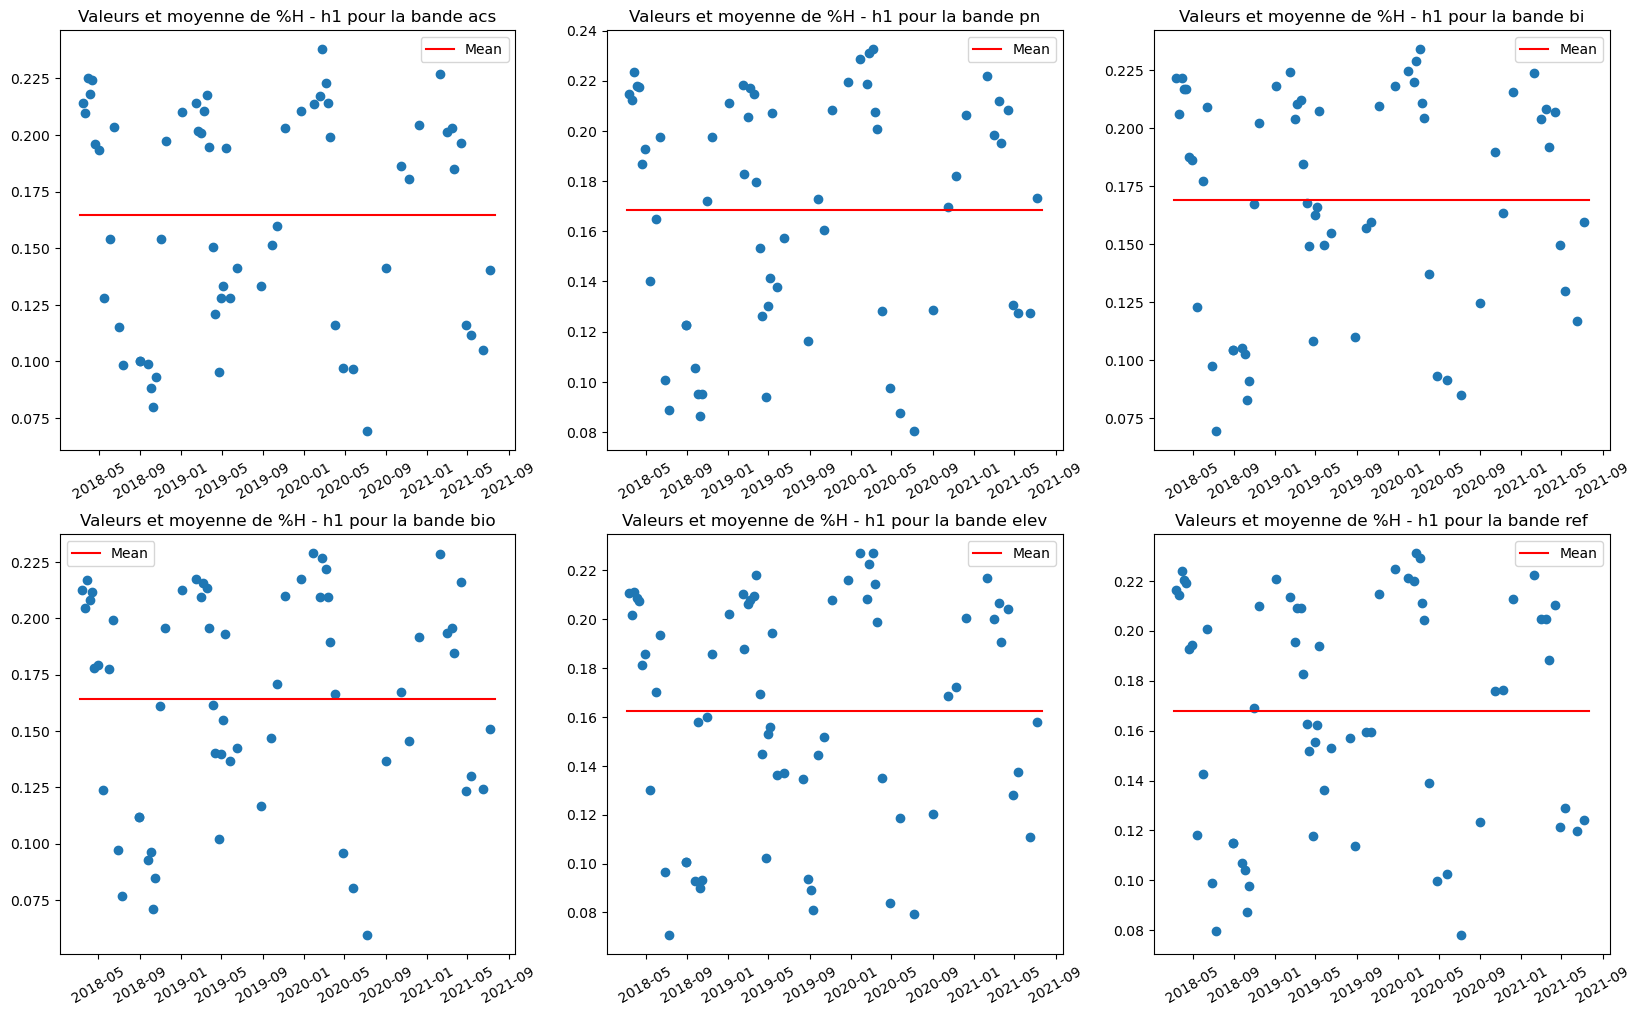

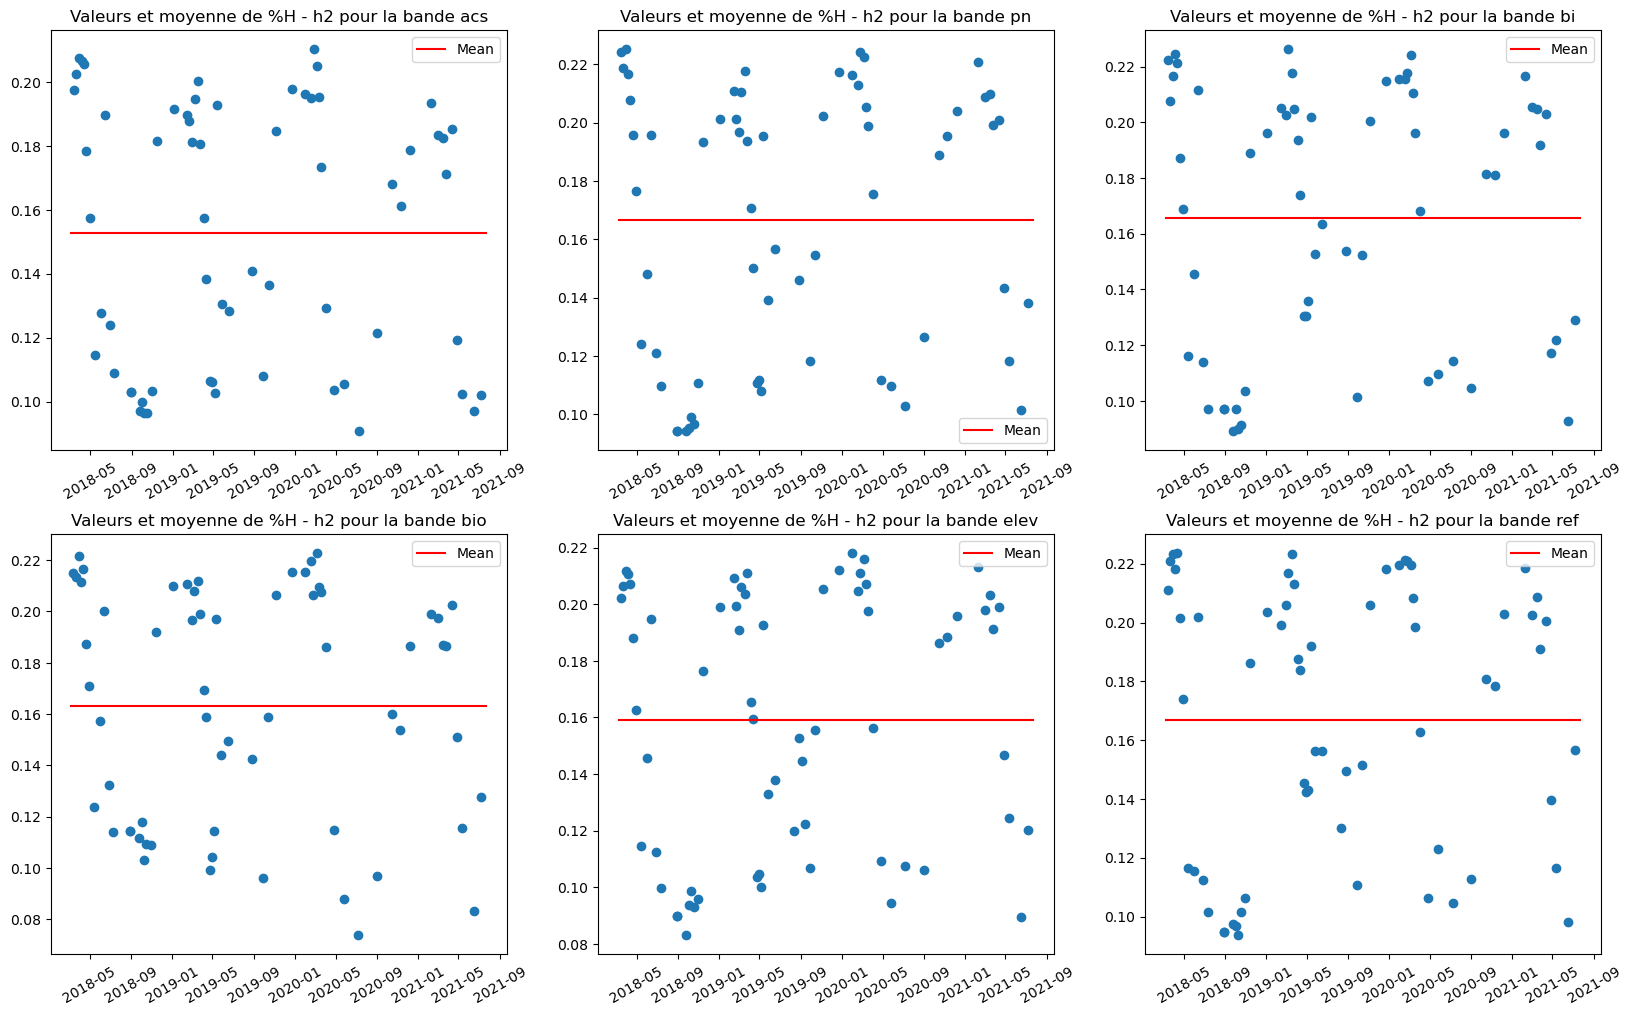

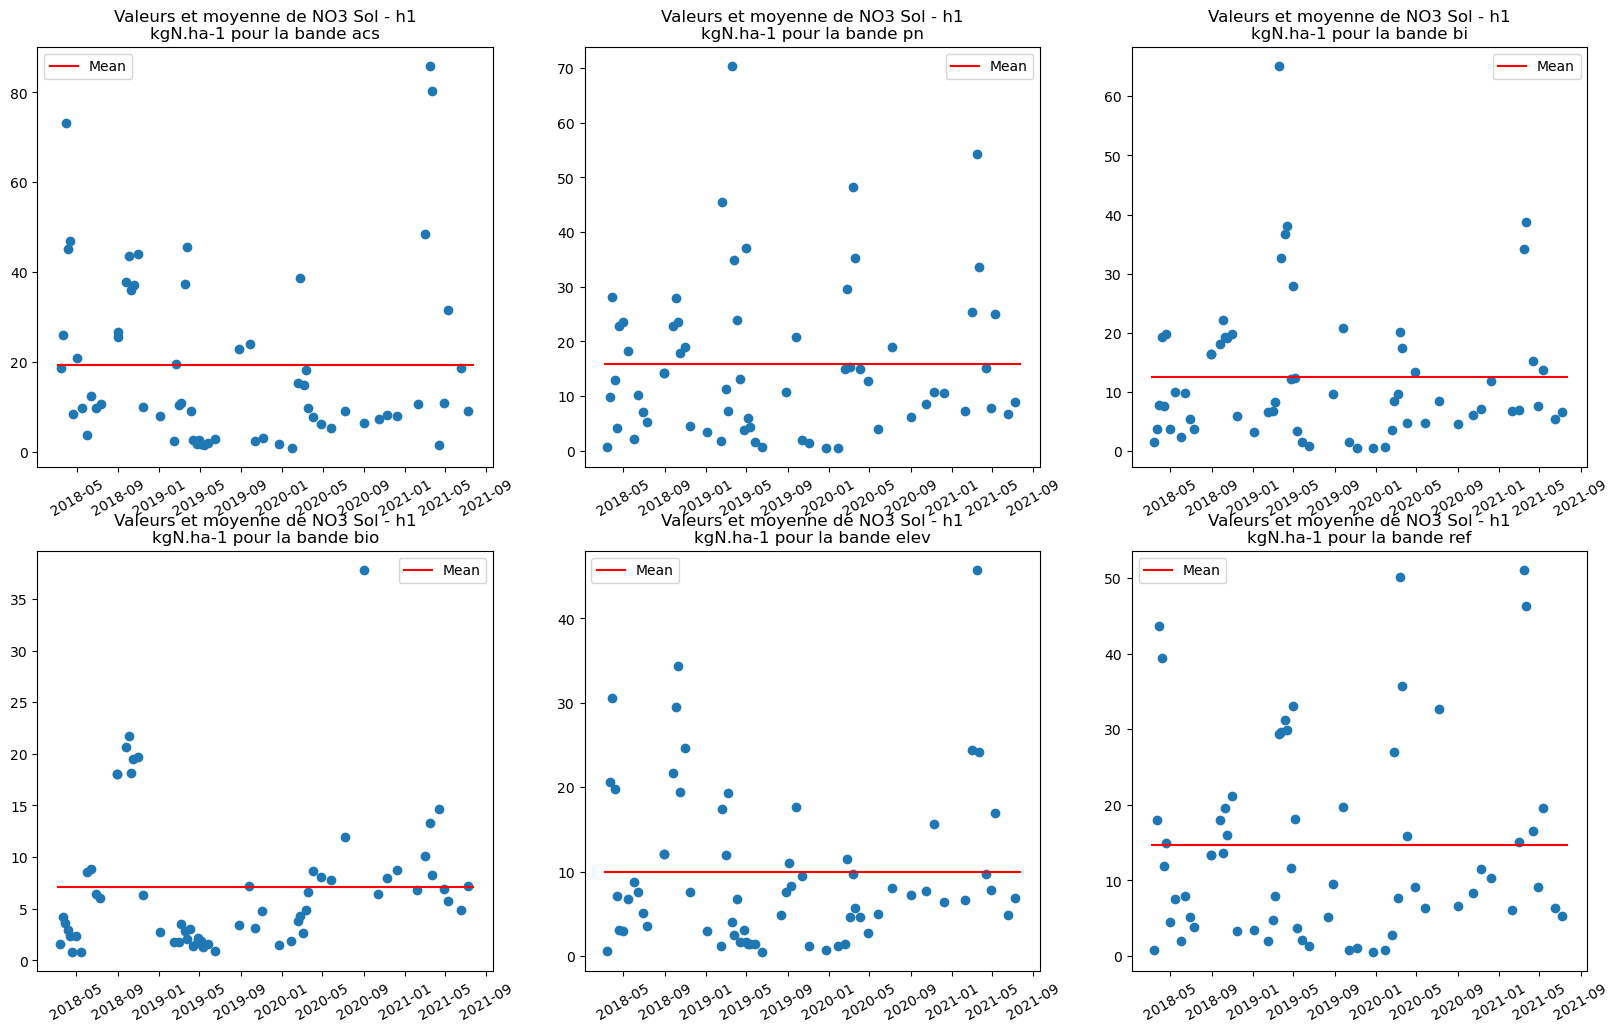

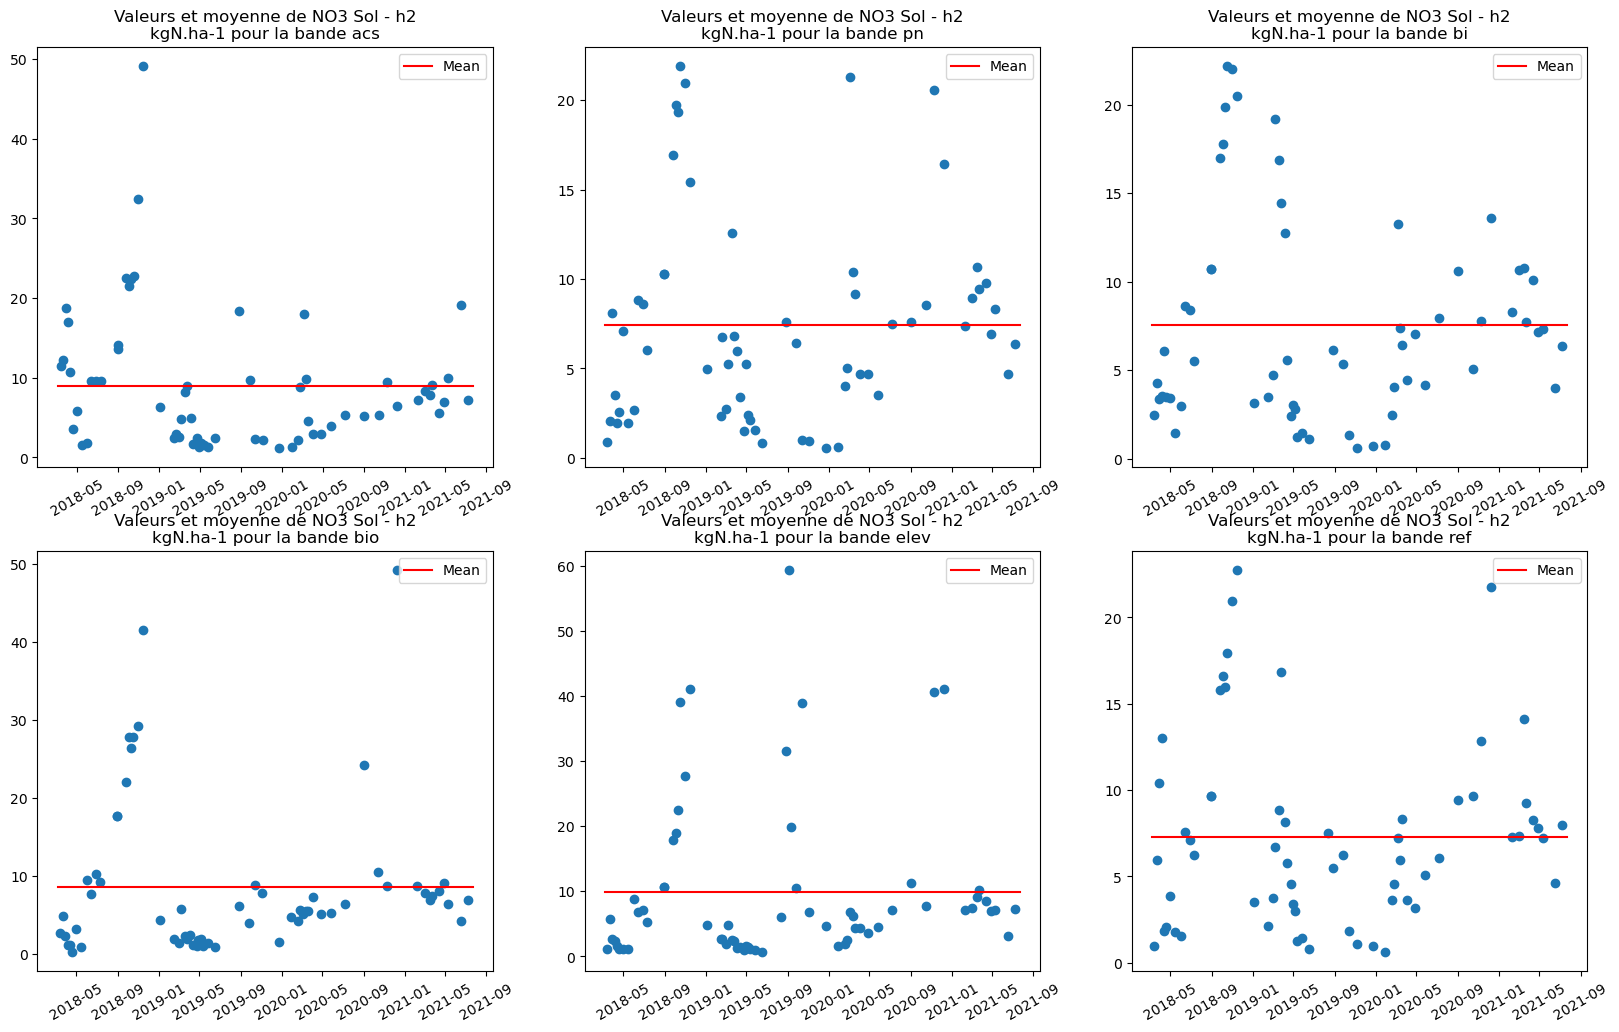

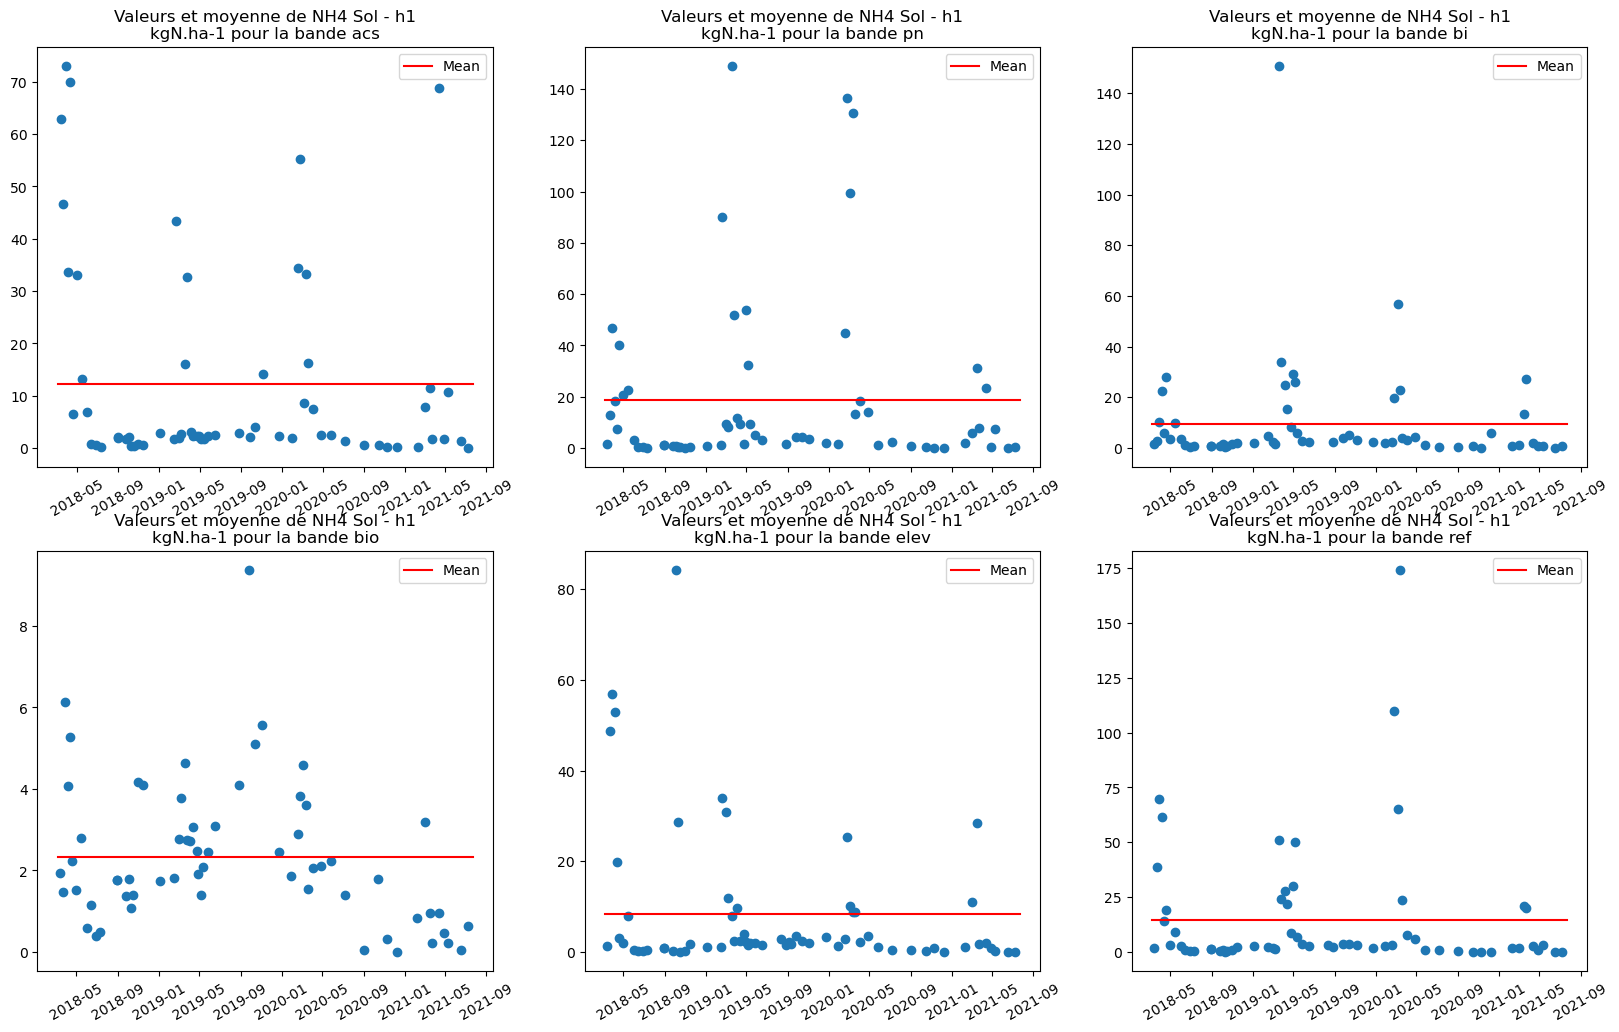

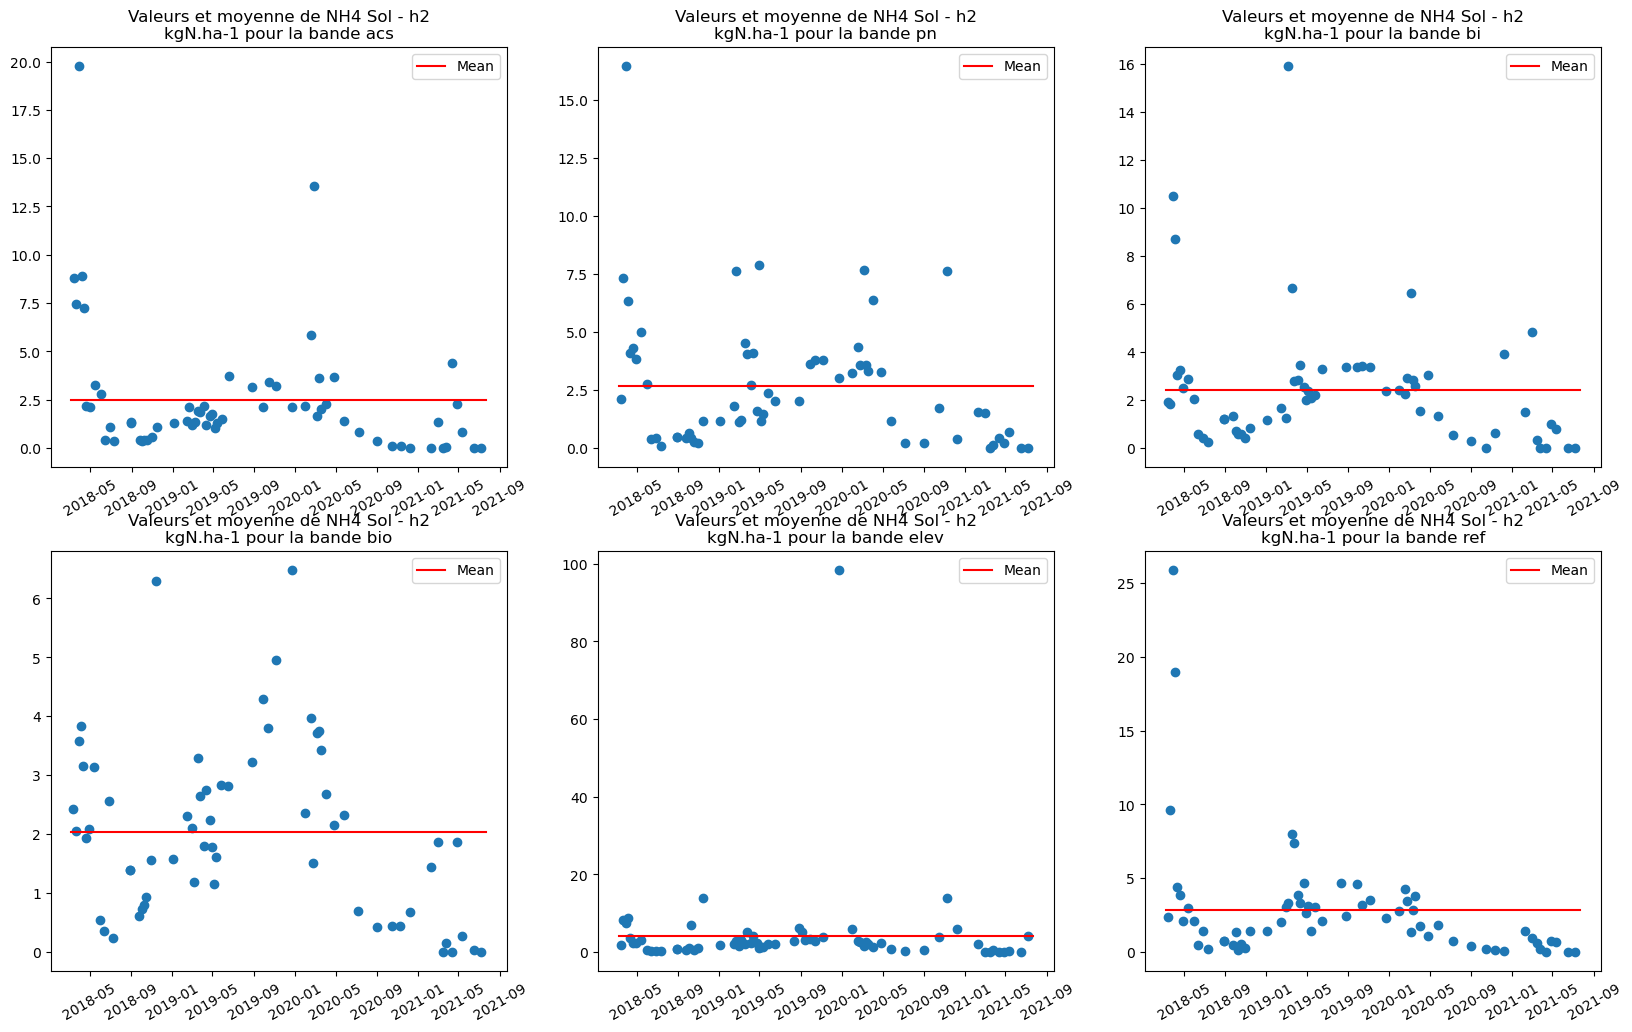

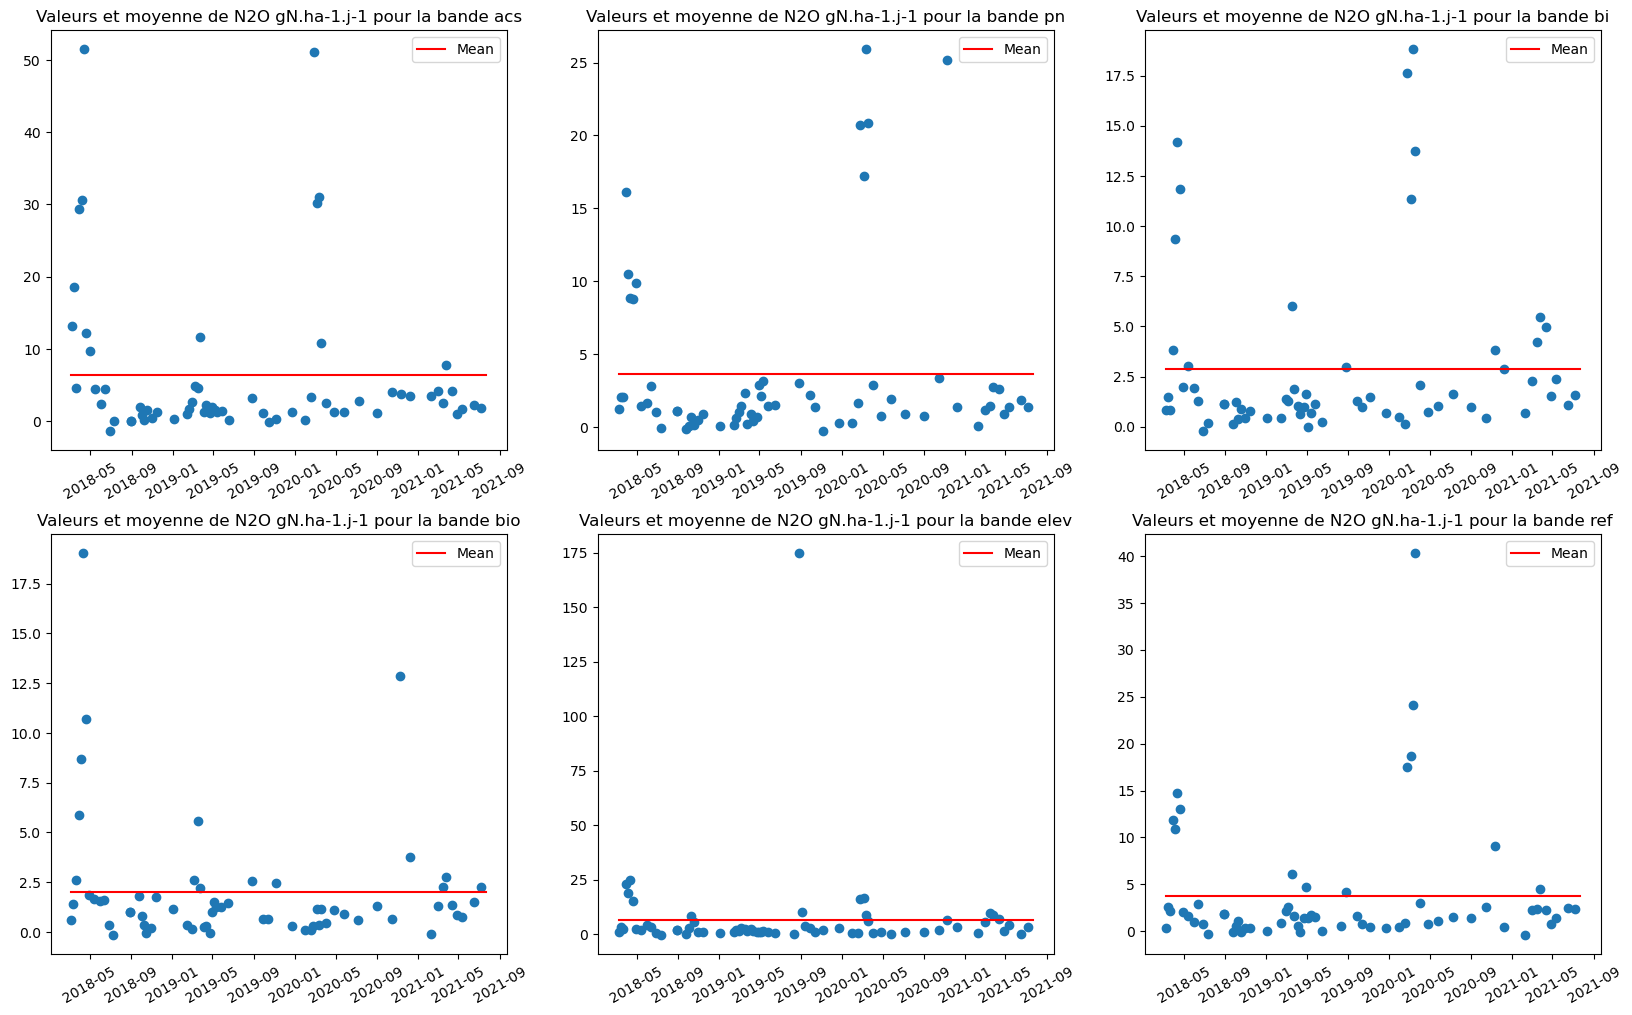

In [77]:
for col in ntraj.columns[2:]:
    plt.figure(figsize=(20,12))
    for i,bande in zip([1,2,3,4,5,6],list_bandes):
        plt.subplot(2,3,i)
        plt.scatter(ntraj["Date"][ntraj["Bande"]==bande], ntraj[ntraj["Bande"]==bande][col])
        plt.plot(ntraj["Date"][ntraj["Bande"]==bande], [np.mean(ntraj[ntraj["Bande"]==bande][col]) for times in range(len(ntraj["Date"][ntraj["Bande"]==bande]))], 'r', label = "Mean")
        plt.legend()
        plt.xticks(rotation=30)
        plt.title("Valeurs et moyenne de " + col + " pour la bande " + bande)

Point aberrant sur elev -> le pic à 174 est du à une erreur de virgule mal placée, il faut modifier ça

In [78]:
print(np.max(ntraj["N2O gN.ha-1.j-1"][ntraj["Bande"]=="elev"]))

174.7421958024754


In [79]:
ntraj.replace(np.max(ntraj["N2O gN.ha-1.j-1"][ntraj["Bande"]=="elev"]), np.max(ntraj["N2O gN.ha-1.j-1"][ntraj["Bande"]=="elev"])/10, inplace=True)

(array([17652., 17775., 17897., 18017., 18140., 18262., 18383., 18506.,
        18628., 18748., 18871.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

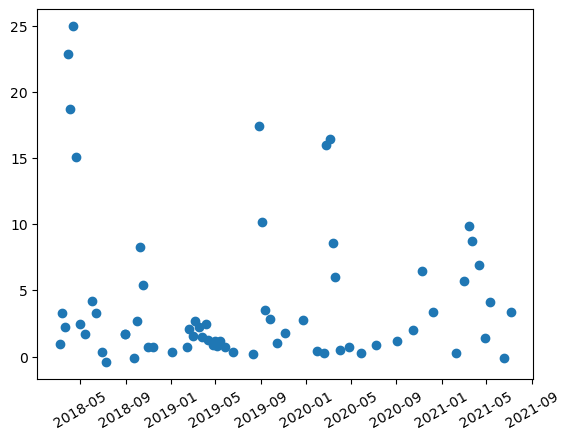

In [80]:
plt.scatter(ntraj["Date"][ntraj["Bande"]=='elev'], ntraj[ntraj["Bande"]=='elev']["N2O gN.ha-1.j-1"])
plt.xticks(rotation=30)

Egalement NH4 h2 pour la bande elev a un point autour de 100 qui écrase complètement le reste.

In [81]:
print(np.max(ntraj["NH4 Sol - h2\nkgN.ha-1"][ntraj["Bande"]=="elev"]))

98.36255279260513


In [82]:
ntraj.replace(np.max(ntraj["NH4 Sol - h2\nkgN.ha-1"][ntraj["Bande"]=="elev"]), np.max(ntraj["NH4 Sol - h2\nkgN.ha-1"][ntraj["Bande"]=="elev"])/10, inplace=True)

(array([17652., 17775., 17897., 18017., 18140., 18262., 18383., 18506.,
        18628., 18748., 18871.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

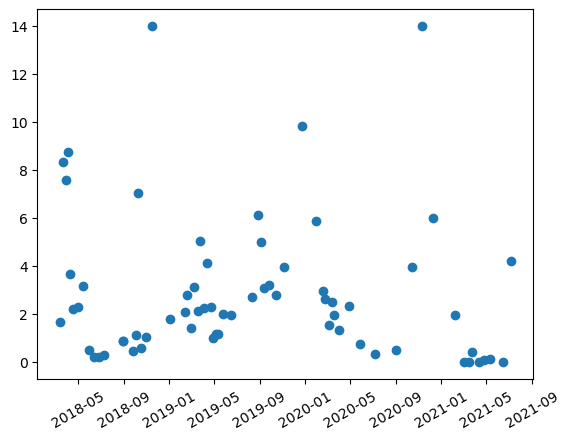

In [83]:
plt.scatter(ntraj["Date"][ntraj["Bande"]=='elev'], ntraj[ntraj["Bande"]=='elev']["NH4 Sol - h2\nkgN.ha-1"])
plt.xticks(rotation=30)

In [84]:
print(ntraj.Bande.dtypes)

## On passe Bande en str pour faciliter le traitement

ntraj["Bande"] = ntraj["Bande"].astype("string")
print(ntraj.Bande.dtypes)

object
string


In [85]:
ntraj = ntraj.drop_duplicates()

In [86]:
ntraj = ntraj.dropna(thresh=6)

In [87]:
ntraj = preprocess(ntraj)

# agit seulement sur la colonne bande, mais cela permet d'avoir une équivalence

In [88]:
ntraj.Bande.unique()

array(['acs', 'bi', 'bio', 'elev', 'pn', 'ref', 'xxx'], dtype=object)

In [89]:
## On va mettre les bandes XXX, Toutes et Elev8 à part pour le moment 

ntraj_XXX = ntraj[ntraj.Bande.str.contains("xxx")]
ntraj_Toutes = ntraj[ntraj.Bande.str.contains("toutes")]
ntraj_Elev8 = ntraj[ntraj.Bande.str.contains("elev8")]

ntraj = ntraj[~ntraj.Bande.str.contains("xxx|toutes|elev8")]

In [90]:
ntraj.head()

,Bande,Date,%H - h1,%H - h2,NO3 Sol - h1\nkgN.ha-1,NO3 Sol - h2\nkgN.ha-1,NH4 Sol - h1\nkgN.ha-1,NH4 Sol - h2\nkgN.ha-1,N2O gN.ha-1.j-1
25,acs,2018-03-14,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,18.537129
26,bi,2018-03-14,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,1.488817
28,bio,2018-03-14,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,1.390654
29,elev,2018-03-14,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,3.297613
31,pn,2018-03-14,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,2.088998


In [91]:
print("Nombre de valeurs de N2O enregistrées : " + str(sum(ntraj["N2O gN.ha-1.j-1"].isna() == False)))

Nombre de valeurs de N2O enregistrées : 374


In [92]:
d0 = list(CP_concat["Date"])[0]
df = list(CP_concat["Date"])[-1]

In [93]:
dates = [dt.strftime('%Y-%m-%d') for dt in rrule(freq=DAILY, dtstart=d0, until=df)] # liste des dates

In [94]:
new_ntraj = pd.DataFrame(columns=ntraj.columns, index=[i for i in range(len(dates))])
new_ntraj["Date"] = dates

In [95]:
new_ntraj["Date"] = new_ntraj["Date"].astype("string")
ntraj["Date"] = ntraj["Date"].astype("string")

In [96]:
new_ntraj.shape

(1662, 9)

In [97]:
for bande in list_bandes:
    ntraj_bande = ntraj[ntraj["Bande"]==bande]
    temp = pd.DataFrame(columns=ntraj.columns,index=[i for i in range(len(dates))])
    temp["Date"] = dates
    for date in dates:
        if date in list(ntraj_bande["Date"].astype("string")):
            temp[temp["Date"]==date] = ntraj_bande[ntraj_bande["Date"]==date].values[0]
    new_ntraj = pd.concat([new_ntraj,temp], axis=0)

In [98]:
new_ntraj.shape

(11634, 9)

In [99]:
print(ntraj[ntraj["Bande"]=="acs"].shape[0] == new_ntraj[new_ntraj["Bande"]=="acs"].shape[0])
print(ntraj[ntraj["Bande"]=="pn"].shape[0] == new_ntraj[new_ntraj["Bande"]=="pn"].shape[0])
print(ntraj[ntraj["Bande"]=="bi"].shape[0] == new_ntraj[new_ntraj["Bande"]=="bi"].shape[0])
print(ntraj[ntraj["Bande"]=="bio"].shape[0] == new_ntraj[new_ntraj["Bande"]=="bio"].shape[0])
print(ntraj[ntraj["Bande"]=="elev"].shape[0] == new_ntraj[new_ntraj["Bande"]=="elev"].shape[0])
print(ntraj[ntraj["Bande"]=="ref"].shape[0] == new_ntraj[new_ntraj["Bande"]=="ref"].shape[0])

False
True
True
True
True
True


Normal pour ACS car il y a une journée avec 2 entrées différentes

In [100]:
new_ntraj = new_ntraj.dropna(subset="Bande") # Petit rajout sinon on a plein de NA

In [101]:
ntraj = new_ntraj

In [102]:
ntraj=ntraj.fillna(0)

In [103]:
ntraj["Date"] = ntraj["Date"].astype("datetime64[ns]")
ntraj["Bande"] = ntraj["Bande"].astype("string")

### Tableau final

On veut un data frame avec pour chaque valeur de N20 enregistrée:
- la valeur en question
- valeur cumulée sur J-X 
- valeur de NO3 mesurée sur les 2 profondeurs H1 et H2
- valeur de NH4 mesurée sur les 2 profondeurs H1 et H2
- humidité sur les 2 profondeurs H1 et H2
- température sur le jour du pic
- humidité de l'air sur le jour du pic
- pluie sur le jour du pic
- type de culture
- peuplement
- bande
- les valeurs météorologiques et techniques moyennes sur J-X selon les dires d'experts
    - valeur de NO3 mesurée sur les 2 profondeurs H1 et H2
    - valeur de NH4 mesurée sur les 2 profondeurs H1 et H2
    - valeurs de N2O
    - INN
    - humidité sur les 2 profondeurs H1 et H2
    - température 
    - humidité de l'air 
    - pluie


In [104]:
ntraj_peak = ntraj[~ntraj["N2O gN.ha-1.j-1"].isna()]
ntraj_peak.shape

(373, 9)

In [105]:
ntraj_peak.reset_index(drop=True, inplace=True)

In [106]:
ntraj_peak.head()

,Bande,Date,%H - h1,%H - h2,NO3 Sol - h1\nkgN.ha-1,NO3 Sol - h2\nkgN.ha-1,NH4 Sol - h1\nkgN.ha-1,NH4 Sol - h2\nkgN.ha-1,N2O gN.ha-1.j-1
0,acs,2018-03-14,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,18.537129
1,acs,2018-03-21,0.209520,0.202532,26.106278,12.204029,46.644215,7.438270,4.627536
2,acs,2018-03-29,0.225337,0.207528,73.099190,18.801835,72.983709,19.757861,29.329117
3,acs,2018-04-05,0.218094,0.206515,45.045180,17.019538,33.717362,8.907422,30.584231
4,acs,2018-04-11,0.224233,0.205574,46.833620,10.759040,70.000703,7.225628,51.510280


In [107]:
CP_concat.head()

,Date,CP,Peuplement,Bande,Travail_sol,Ajout_phyto,Semis,Recolte,uN,nbJours_travail_sol,...,nbJours_semis,nbJours_rec,nbJours_ferti,Travail_sol_60J,Ajout_phyto_30J,Ajout_phyto_45J,Ajout_phyto_60J,Ajout_ferti_30J,Ajout_ferti_45J,Ajout_ferti_60J
0,2017-10-05,ble,sol_nu,acs,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2017-10-06,ble,sol_nu,acs,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,2017-10-07,ble,sol_nu,acs,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,2017-10-08,ble,sol_nu,acs,0.0,0.0,0.0,0.0,0.0,3.0,...,3.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2017-10-09,ble,sol_nu,acs,0.0,0.0,0.0,0.0,0.0,4.0,...,4.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [108]:
def rolling_by(df_table : object, name_col : list, delta : int = 1, aggr : object = lambda x: x.mean(), forward : bool = False) -> object:
    """
    Input :
        - df_table : input dataframe 
        - name_col : list of the columns that we are targetting
            ex : ['Temp moyenne (°C)', 'Pluie (mm)']
        - delta : Number of days for the rolling
        - aggr : Aggregation function (mean, sum ...) 
    Output :
        - Dataframe rolled over the delta day windows and aggregated by aggr.
    """
    # Get first column with the format datetime64
    try :
        date_col = df_table.select_dtypes(include="datetime64").columns[0]
    except IndexError :
        print("There is no datetime column")
        return IndexError

    if forward == False:
        name_col.insert(0,date_col)
        return (df_table[name_col].sort_index().rolling(window=delta, on=date_col).apply(aggr))
    else:
        df_table["roll_from_J{}".format(delta)] = df_table[date_col]+datetime.timedelta(delta)
        name_col.insert(0, "roll_from_J{}".format(delta))
        return (df_table[name_col].sort_index().rolling(window=2*delta, on="roll_from_J{}".format(delta)).apply(aggr))

# Faudra juste faire attention à renommer les colonnes de l'output (on peut intégrer ça à la fonction)

In [109]:
data = pd.DataFrame()

for idx,value in zip(ntraj_peak.index, ntraj_peak["N2O gN.ha-1.j-1"]):
    doi = ntraj_peak.at[idx, "Date"]
    bande = ntraj_peak.at[idx, "Bande"]

    ntraj_bande = ntraj[ntraj["Bande"] == bande].reset_index(drop=True)
    CP_bande = CP_concat[CP_concat["Bande"]==bande].reset_index(drop=True)
    
    df_data = pd.DataFrame({"N2O":[value], "Date":[doi], "Bande":[bande], "soilH_h1":[ntraj_bande[ntraj_bande["Date"]==doi]["%H - h1"].values[0]],
                         "soilH_h2":[ntraj_bande[ntraj_bande["Date"]==doi]["%H - h2"].values[0]], "NO3_h1":[ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h1\nkgN.ha-1"].values[0]],
                         "NO3_h2":[ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h2\nkgN.ha-1"].values[0]], "NH4_h1":[ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h1\nkgN.ha-1"].values[0]],
                         "NH4_h2":[ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h2\nkgN.ha-1"].values[0]], "meanTP":[meteo[meteo["Date"]==doi]["Temp moyenne (°C)"].values[0]],
                         "air_humidity":[meteo[meteo["Date"]==doi]["Humidité moyenne (%)"].values[0]], "pluie":[meteo[meteo["Date"]==doi]["Pluie (mm)"].values[0]],
                         "CP":CP_bande[CP_bande["Date"]==doi]["CP"].values[0], "peuplement":[CP_bande[CP_bande["Date"]==doi]["Peuplement"].values[0]],
                         "fertilisation":[CP_bande[CP_bande["Date"]==doi]["uN"].values[0]], "nbJours_ferti":[CP_bande[CP_bande["Date"]==doi]["nbJours_ferti"].values[0]],
                         "travail_sol":[CP_bande[CP_bande["Date"]==doi]["Travail_sol"].values[0]], "ajout_phyto":[CP_bande[CP_bande["Date"]==doi]["Ajout_phyto"].values[0]],
                         "semis":[CP_bande[CP_bande["Date"]==doi]["Semis"].values[0]], "recolte":[CP_bande[CP_bande["Date"]==doi]["Recolte"].values[0]], 
                         "mean_soilH_h1":rolling_by(ntraj_bande, ["%H - h1"], 5, lambda x: x.mean())[rolling_by(ntraj_bande, ["%H - h1"], 5, lambda x: x.mean())["Date"]==doi].iloc[:,1],
                         "mean_soilH_h2":rolling_by(ntraj_bande, ["%H - h2"], 5, lambda x: x.mean())[rolling_by(ntraj_bande, ["%H - h2"], 5, lambda x: x.mean())["Date"]==doi].iloc[:,1],
                         "mean_NO3_h1":rolling_by(ntraj_bande, ["NO3 Sol - h1\nkgN.ha-1"], 5, lambda x: x.mean())[rolling_by(ntraj_bande, ["NO3 Sol - h1\nkgN.ha-1"], 5, lambda x: x.mean())["Date"]==doi].iloc[:,1],
                         "mean_NO3_h2":rolling_by(ntraj_bande, ["NO3 Sol - h2\nkgN.ha-1"], 5, lambda x: x.mean())[rolling_by(ntraj_bande, ["NO3 Sol - h2\nkgN.ha-1"], 5, lambda x: x.mean())["Date"]==doi].iloc[:,1],
                         "mean_NH4_h1":rolling_by(ntraj_bande, ["NH4 Sol - h1\nkgN.ha-1"], 5, lambda x: x.mean())[rolling_by(ntraj_bande, ["NH4 Sol - h1\nkgN.ha-1"], 5, lambda x: x.mean())["Date"]==doi].iloc[:,1],
                         "mean_NH4_h2":rolling_by(ntraj_bande, ["NH4 Sol - h2\nkgN.ha-1"], 5, lambda x: x.mean())[rolling_by(ntraj_bande, ["NH4 Sol - h2\nkgN.ha-1"], 5, lambda x: x.mean())["Date"]==doi].iloc[:,1]})


    dfs = [data, df_data]
    data = pd.concat(dfs, axis=0, ignore_index=True) 
    data = pd.DataFrame(data)

In [110]:
data

,N2O,Date,Bande,soilH_h1,soilH_h2,NO3_h1,NO3_h2,NH4_h1,NH4_h2,meanTP,...,travail_sol,ajout_phyto,semis,recolte,mean_soilH_h1,mean_soilH_h2,mean_NO3_h1,mean_NO3_h2,mean_NH4_h1,mean_NH4_h2
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,8.8,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.627536,2018-03-21,acs,0.209520,0.202532,26.106278,12.204029,46.644215,7.438270,3.1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,29.329117,2018-03-29,acs,0.225337,0.207528,73.099190,18.801835,72.983709,19.757861,6.3,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,30.584231,2018-04-05,acs,0.218094,0.206515,45.045180,17.019538,33.717362,8.907422,7.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,51.510280,2018-04-11,acs,0.224233,0.205574,46.833620,10.759040,70.000703,7.225628,12.0,...,0.0,0.0,0.0,0.0,0.218273,0.203912,41.962339,14.051206,57.237216,10.430294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2.228297,2021-04-13,ref,0.210391,0.200501,16.539117,8.242187,2.681287,0.000000,5.0,...,0.0,0.0,0.0,0.0,0.206072,0.204197,27.011539,9.249589,9.501761,0.640605
369,0.804216,2021-04-27,ref,0.121531,0.139716,9.159257,7.791461,0.848945,0.729377,11.3,...,0.0,0.0,0.0,0.0,0.185877,0.188460,27.633874,9.350816,9.293576,0.502510
370,1.463299,2021-05-11,ref,0.128868,0.116625,19.640057,7.208329,3.318003,0.669581,11.7,...,0.0,1.0,0.0,0.0,0.170745,0.171295,28.544565,9.329109,9.612187,0.443977
371,2.455544,2021-06-17,ref,0.119952,0.098175,6.401421,4.623392,0.000000,0.000000,21.3,...,0.0,0.0,0.0,0.0,0.153816,0.149207,19.613303,7.426896,5.412796,0.326511


In [111]:
# def previous_days(df, nb_jours):
#     data = pd.DataFrame()
#     for rows in df.index:
#         date = df.at[rows, "Date"]
#         bande = df.at[rows, "Bande"]
#         ddata = pd.DataFrame()
#         for days in range(1,nb_jours+1):
#             doi = date - datetime.timedelta(days=days)

#             # données ntraj
#             data_n = dict()
#             ntraj_bande = ntraj[ntraj["Bande"] == bande]
#             data_n["soilH_H1_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["%H - h1"]
#             data_n["soilH_H2_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["%H - h2"]
#             data_n["NO3_H1_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h1\nkgN.ha-1"]
#             data_n["NO3_H2_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h2\nkgN.ha-1"]
#             data_n["NH4_H1_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h1\nkgN.ha-1"]
#             data_n["NH4_H2_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h2\nkgN.ha-1"]
    
#             # données météo
#             data_m = dict()
#             data_m["meanTP_J{}".format(days)] = meteo[meteo["Date"]==doi]["Temp moyenne (°C)"]
#             data_m["airH_J{}".format(days)] = meteo[meteo["Date"]==doi]["Humidité moyenne (%)"]
#             data_m["pluie_J{}".format(days)] = meteo[meteo["Date"]==doi]["Pluie (mm)"]

#             # données itk

#             CP_concat_bande = CP_concat[CP_concat["Bande"]==bande]
#             data_itk = dict()
#             data_itk["CP_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["CP"]
#             data_itk["peuplement_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["Peuplement"]
#             data_itk["travail_sol{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["Travail_sol"]
#             data_itk["nbJours_travail_sol_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["nbJours_travail_sol"]
#             data_itk["ajout_phyto_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["Ajout_phyto"]
#             data_itk["nbJours_phyto_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["nbJours_phyto"]
#             data_itk["semis_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["Semis"]
#             data_itk["nbJours_semis_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["nbJours_semis"]
#             data_itk["recolte_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["Recolte"]
#             data_itk["nbJours_rec_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["nbJours_rec"]
#             data_itk["ferti_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["uN"]
#             data_itk["nbJours_ferti_J{}".format(days)] = CP_concat_bande[CP_concat_bande["Date"]==doi]["nbJours_ferti"]

#             df_data_n = pd.DataFrame(data_n)
#             df_data_m = pd.DataFrame(data_m)
#             df_data_itk = pd.DataFrame(data_itk)

#             df_data_1 = pd.concat([df_data_n.reset_index(drop=True), df_data_m.reset_index(drop=True)], axis=1)
#             df_data = pd.concat([df_data_1.reset_index(drop=True), df_data_itk.reset_index(drop=True)], axis=1)
#             ddata = pd.concat([ddata.reset_index(drop=True), df_data.reset_index(drop=True)], axis=1)
#         data = pd.concat([data.reset_index(drop=True), ddata.reset_index(drop=True)], axis=0, ignore_index=True)
#     return(data)

In [112]:
# days_before = 5

# data = pd.concat([dataf.reset_index(drop=True), previous_days(dataf, days_before).reset_index(drop=True)], axis=1)

Valeurs moyennes de N2O sur plusieurs jours pour l'identification des pics + moyennes et sommes de certaines valeurs météorologiques d'intérêt

In [113]:
data["N2O_J45"] = rolling_by(data, ['N2O'], delta=45, aggr=np.mean, forward=True).iloc[:,1]
data["N2O_J60"] = rolling_by(data, ['N2O'], delta=60, aggr=np.mean, forward=True).iloc[:,1]

# données météo 
data = pd.merge(data, rolling_by(meteo, ['Temp moyenne (°C)', 'Humidité moyenne (%)', 'Temp max', 'Humidité max (%)', 'Temp min', 'Humidité min (%)'], 5, lambda x: x.mean()), on='Date')
data.rename(columns={data.columns[-6]: "Temp_moyenne_5J"}, inplace=True)
data.rename(columns={data.columns[-5]: "Humidite_moyenne_5J"}, inplace=True)
data.rename(columns={data.columns[-4]: "Temp_max_5J"}, inplace=True)
data.rename(columns={data.columns[-3]: "Humidite_max_5J"}, inplace=True)
data.rename(columns={data.columns[-2]: "Temp_min_5J"}, inplace=True)
data.rename(columns={data.columns[-1]: "Humidite_min_5J"}, inplace=True)

data = pd.merge(data, rolling_by(meteo, ['Pluie (mm)', 'ETP Penman (mm)'], 5, lambda x: x.sum()), on='Date')
data.rename(columns={data.columns[-2]: "Sum_pluie_5J"}, inplace=True)
data.rename(columns={data.columns[-1]: "Sum_ETP_5J"}, inplace=True)

In [114]:
data = data.loc[:,~data.columns.str.startswith("roll")]

In [115]:
from sklearn.preprocessing import OneHotEncoder

Bande = data.Bande
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(Bande.values.reshape(-1, 1))
encodage_df = pd.DataFrame(encoded_data, columns=Bande.unique())
data = pd.concat([data, encodage_df], axis=1)
# data = data.drop(data.columns[[2]], axis=1) # Drop la colonne bande qui ne sert plus
data.head()

,N2O,Date,Bande,soilH_h1,soilH_h2,NO3_h1,NO3_h2,NH4_h1,NH4_h2,meanTP,...,Temp_min_5J,Humidite_min_5J,Sum_pluie_5J,Sum_ETP_5J,acs,pn,bi,bio,elev,ref
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,8.8,...,7.5,10.54,8.8,28.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.088998,2018-03-14,pn,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,8.8,...,7.5,10.54,8.8,28.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.488817,2018-03-14,bi,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,8.8,...,7.5,10.54,8.8,28.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.390654,2018-03-14,bio,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,8.8,...,7.5,10.54,8.8,28.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.297613,2018-03-14,elev,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,8.8,...,7.5,10.54,8.8,28.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
data['week'] = data['Date'].dt.isocalendar().week
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year


year = data.year
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(year.values.reshape(-1, 1))
encodage_df = pd.DataFrame(encoded_data, columns=year.unique())
data = pd.concat([data, encodage_df], axis=1)
# data = data.drop(data.columns[[1]], axis=1) # Drop la colonne Date qui ne sert plus
data.head()

,N2O,Date,Bande,soilH_h1,soilH_h2,NO3_h1,NO3_h2,NH4_h1,NH4_h2,meanTP,...,bio,elev,ref,week,month,year,2018,2019,2020,2021
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,8.8,...,0.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
1,2.088998,2018-03-14,pn,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,8.8,...,0.0,1.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
2,1.488817,2018-03-14,bi,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,8.8,...,0.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
3,1.390654,2018-03-14,bio,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,8.8,...,0.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
4,3.297613,2018-03-14,elev,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,8.8,...,1.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0


In [117]:
data.to_csv("data_pretraite.csv", sep=";")